<a href="https://colab.research.google.com/github/lawho13/Structural-analysis-of-regional-economies-based-on-I-O-data/blob/main/notebooks/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References, Notes


In [ ]:
#3 reference/data links reccomended
# https://www.rug.nl/ggdc/valuechain/wiod/wiod-2016-release
# https://www.bea.gov/industry/input-output-accounts-data
# https://math.libretexts.org/Bookshelves/Applied_Mathematics/Applied_Finite_Mathematics_(Sekhon_and_Bloom)/02%3A_Matrices/2.06%3A_Applications__Leontief_Models

#sample presentation
# https://rutgersconnect-my.sharepoint.com/:p:/r/personal/hz333_connect_rutgers_edu/_layouts/15/Doc.aspx?sourcedoc=%7B2565D39D-069A-46EE-90FA-DCBA1390C5EE%7D&file=sample.pptx&action=edit&mobileredirect=true

#downloaded project directions (look at 14)
# file:///C:/Users/vrqx9/Downloads/project%20topic%20list.pdf

#ran these commands to turn the 'data' sheet of the excel download into a csv
# !pip install xlsx2csv
# !xlsx2csv -s 3 lr_wiod_wiot_wide.xlsx > lr_wiod_wiot_wide.csv
# !pip install matplotlib


Structure of a input output model
- x=Ax+y
- x is the total output vector given by industry
- Ax is the intermediate demand (inputs used by industry)
- y is the final demand
y = (I-A)x, thus to find how much an industry needs to output (x), inverse((I-A)x) = y
- Leontief matrix L = inv(I-A)
- it gives you the total output x needed to fulfill demand y
- demand y given by "xCONS_h": "Final Consumption Expenditure by Households",
    "xCONS_g": "Final Consumption Expenditure by Government",
    "xGFCF": "Gross Fixed Capital Formation",
    "xINV": "Changes in Inventories"

Lawrence- plot y trends from year to year for each country, find L matrix and plot trends for all countries year to year for each entry

# Imports, Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# from matplotlib.lines import Line2D
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#data: https://www.rug.nl/ggdc/valuechain/long-run-wiod
#clicked "WIOT Tables Excel"
#size is 168mb qualifying for all 30 bonus points

#need to upload the csv to your google drive to read

df = pd.read_csv("/content/drive/My Drive/CS439 Final Project/lr_wiod_wiot_wide.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# #data: https://www.rug.nl/ggdc/valuechain/long-run-wiod
# #clicked "WIOT Tables Excel"
# #size is 168mb qualifying for all 30 bonus points

# #need to upload the csv to your google drive to read

# df = pd.read_csv("/content/drive/My Drive/lr_wiod_wiot_wide.csv")


In [ ]:
pd.set_option('display.max_columns', None)

#prints every col by line
# for col in df.columns:
#     print(col)

# Data Prepreparation


##Sector Mapping

In [ ]:
#countries in dataset
# print(df['row_country'].value_counts(dropna=False))

#codes for sectors i presume

df.rename(columns={"year": "Year", "row_isic3": "Sector"}, inplace=True)

code_to_description = {
    "AtB": "Agriculture, Hunting, Forestry, and Fishing",
    "C": "Mining and Quarrying",
    "D15t16": "Food, Beverages, and Tobacco",
    "D17t19": "Textiles, Textile Products, Leather, Footwear",
    "D21t22": "Pulp, Paper, Printing, Publishing",
    "D23": "Coke, Refined Petroleum, and Nuclear Fuel",
    "D24": "Chemicals and Chemical Products",
    "D25": "Rubber and Plastics",
    "D26": "Other Non-Metallic Mineral Products",
    "D27t28": "Basic and Fabricated Metals",
    "D29": "Machinery and Equipment n.e.c.",
    "D30t33": "Electrical and Optical Equipment",
    "D34t35": "Transport Equipment",
    "Dnec": "Manufacturing n.e.c.; Recycling",
    "E": "Electricity, Gas, and Water Supply",
    "F": "Construction",
    "G": "Wholesale and Retail Trade; Repairs",
    "H": "Hotels and Restaurants",
    "I60t63": "Transport and Storage",
    "I64": "Post and Telecommunications",
    "J": "Financial Intermediation",
    "K": "Real Estate, Renting, and Business Activities",
    "LtQ": "Public Administration, Education, Health, and Other Services",
    "xCONS_h": "Final Consumption Expenditure by Households",
    "xCONS_g": "Final Consumption Expenditure by Government",
    "xGFCF": "Gross Fixed Capital Formation",
    "xINV": "Changes in Inventories"
}

df["Sector"] = df["Sector"].map(code_to_description)

for (k,v) in code_to_description.items():
    print(k, " --- ", v)

# print(df["row_isic3"].value_counts(dropna=False))




AtB  ---  Agriculture, Hunting, Forestry, and Fishing
C  ---  Mining and Quarrying
D15t16  ---  Food, Beverages, and Tobacco
D17t19  ---  Textiles, Textile Products, Leather, Footwear
D21t22  ---  Pulp, Paper, Printing, Publishing
D23  ---  Coke, Refined Petroleum, and Nuclear Fuel
D24  ---  Chemicals and Chemical Products
D25  ---  Rubber and Plastics
D26  ---  Other Non-Metallic Mineral Products
D27t28  ---  Basic and Fabricated Metals
D29  ---  Machinery and Equipment n.e.c.
D30t33  ---  Electrical and Optical Equipment
D34t35  ---  Transport Equipment
Dnec  ---  Manufacturing n.e.c.; Recycling
E  ---  Electricity, Gas, and Water Supply
F  ---  Construction
G  ---  Wholesale and Retail Trade; Repairs
H  ---  Hotels and Restaurants
I60t63  ---  Transport and Storage
I64  ---  Post and Telecommunications
J  ---  Financial Intermediation
K  ---  Real Estate, Renting, and Business Activities
LtQ  ---  Public Administration, Education, Health, and Other Services
xCONS_h  ---  Final Consu

In [ ]:
import matplotlib.font_manager
# sorted({f.name for f in matplotlib.font_manager.fontManager.ttflist})


##Subsetting by Country


In [ ]:
countries = sorted([c for c in df['row_country'].unique() if c not in ['xROW', 'xTOT']])

region_map = {
    'USA': 'Americas',
    'CAN': 'Americas',
    'MEX': 'Americas',
    'AUT': 'Europe',
    'BEL': 'Europe',
    'DEU': 'Europe',
    'DNK': 'Europe',
    'ESP': 'Europe',
    'FIN': 'Europe',
    'FRA': 'Europe',
    'GBR': 'Europe',
    'GRC': 'Europe',
    'IRL': 'Europe',
    'ITA': 'Europe',
    'NLD': 'Europe',
    'PRT': 'Europe',
    'SWE': 'Europe',
    'AUS': 'Asia-Pacific',
    'CHN': 'Asia-Pacific',
    'HKG': 'Asia-Pacific',
    'IND': 'Asia-Pacific',
    'JPN': 'Asia-Pacific',
    'KOR': 'Asia-Pacific',
    'TWN': 'Asia-Pacific',
    'BRA': 'Americas'
}

#dict to store each df
country_dfs = {}

for country in countries:
    # Columns that belong to this country
    cols = ['row_country', 'Year', 'Sector'] + [c for c in df.columns if country in c]

    # Subset the dataframe for this country's rows
    country_df = df[df['row_country'] == country][cols].copy()

    rename_dict = {f"{country}_{k}": v for k, v in code_to_description.items() if f"{country}_{k}" in country_df.columns}
    country_df.rename(columns=rename_dict, inplace=True)

    #redundant info so drop row_country
    country_df.drop(columns=['row_country'], inplace=True)

    country_dfs[country] = country_df

print(f"Generated dataframes for {len(country_dfs)} countries: {list(country_dfs.keys())}")

#Lawrence Part
# plot y trends from year to year for each country, find L matrix and plot trends for all countries year to year for each entry
output_components = ["Final Consumption Expenditure by Households",
                     "Final Consumption Expenditure by Government",
                     "Gross Fixed Capital Formation",
                     "Changes in Inventories"]
df_all = []

for country, df_country in country_dfs.items():
    temp = df_country.copy()
    temp["Country"] = country
    temp["Region"] = country  # temporarily fill
    temp["Region"] = temp["Country"].map(region_map)  # map to region
    df_all.append(temp)

# Combine all countries
df_all = pd.concat(df_all, ignore_index=True)

component_titles = {
    "Final Consumption Expenditure by Households": "Final Consumption\nby Households",
    "Final Consumption Expenditure by Government": "Final Consumption\nby Government",
    "Gross Fixed Capital Formation": "Gross Fixed\nCapital Formation",
    "Changes in Inventories": "Changes in Inventories"
}

components_long = df_all.melt(
    id_vars=["Year", "Country"],
    value_vars=output_components,
    var_name="Component",
    value_name="Value"
)



Generated dataframes for 25 countries: ['AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'CHN', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'IND', 'IRL', 'ITA', 'JPN', 'KOR', 'MEX', 'NLD', 'PRT', 'SWE', 'TWN', 'USA']


# Final Demand Stat Plot


In [ ]:
sector_cols = [c for c in df_all.columns if c not in output_components + ["Year", "Country", "Region"]]

# If you have melted sector data with a 'Sector' column
sectors_long = df_all.melt(
    id_vars=["Year", "Country", "Region"],
    value_vars=[c for c in df_all.columns if c not in output_components + ["Year", "Country", "Region"]],
    var_name="Sector",
    value_name="Value"
)

# Drop any rows where Sector = "Sector"
sectors_long = sectors_long[sectors_long["Sector"] != "Sector"]


# Compute mean by Year, Region, Sector
regional_avg = sectors_long.groupby(["Year", "Region", "Sector"])["Value"].mean().reset_index()

#regional_avg['Sector'].unique()

/tmp/ipython-input-3775530391.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-3775530391.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-3775530391.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-3775530391.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


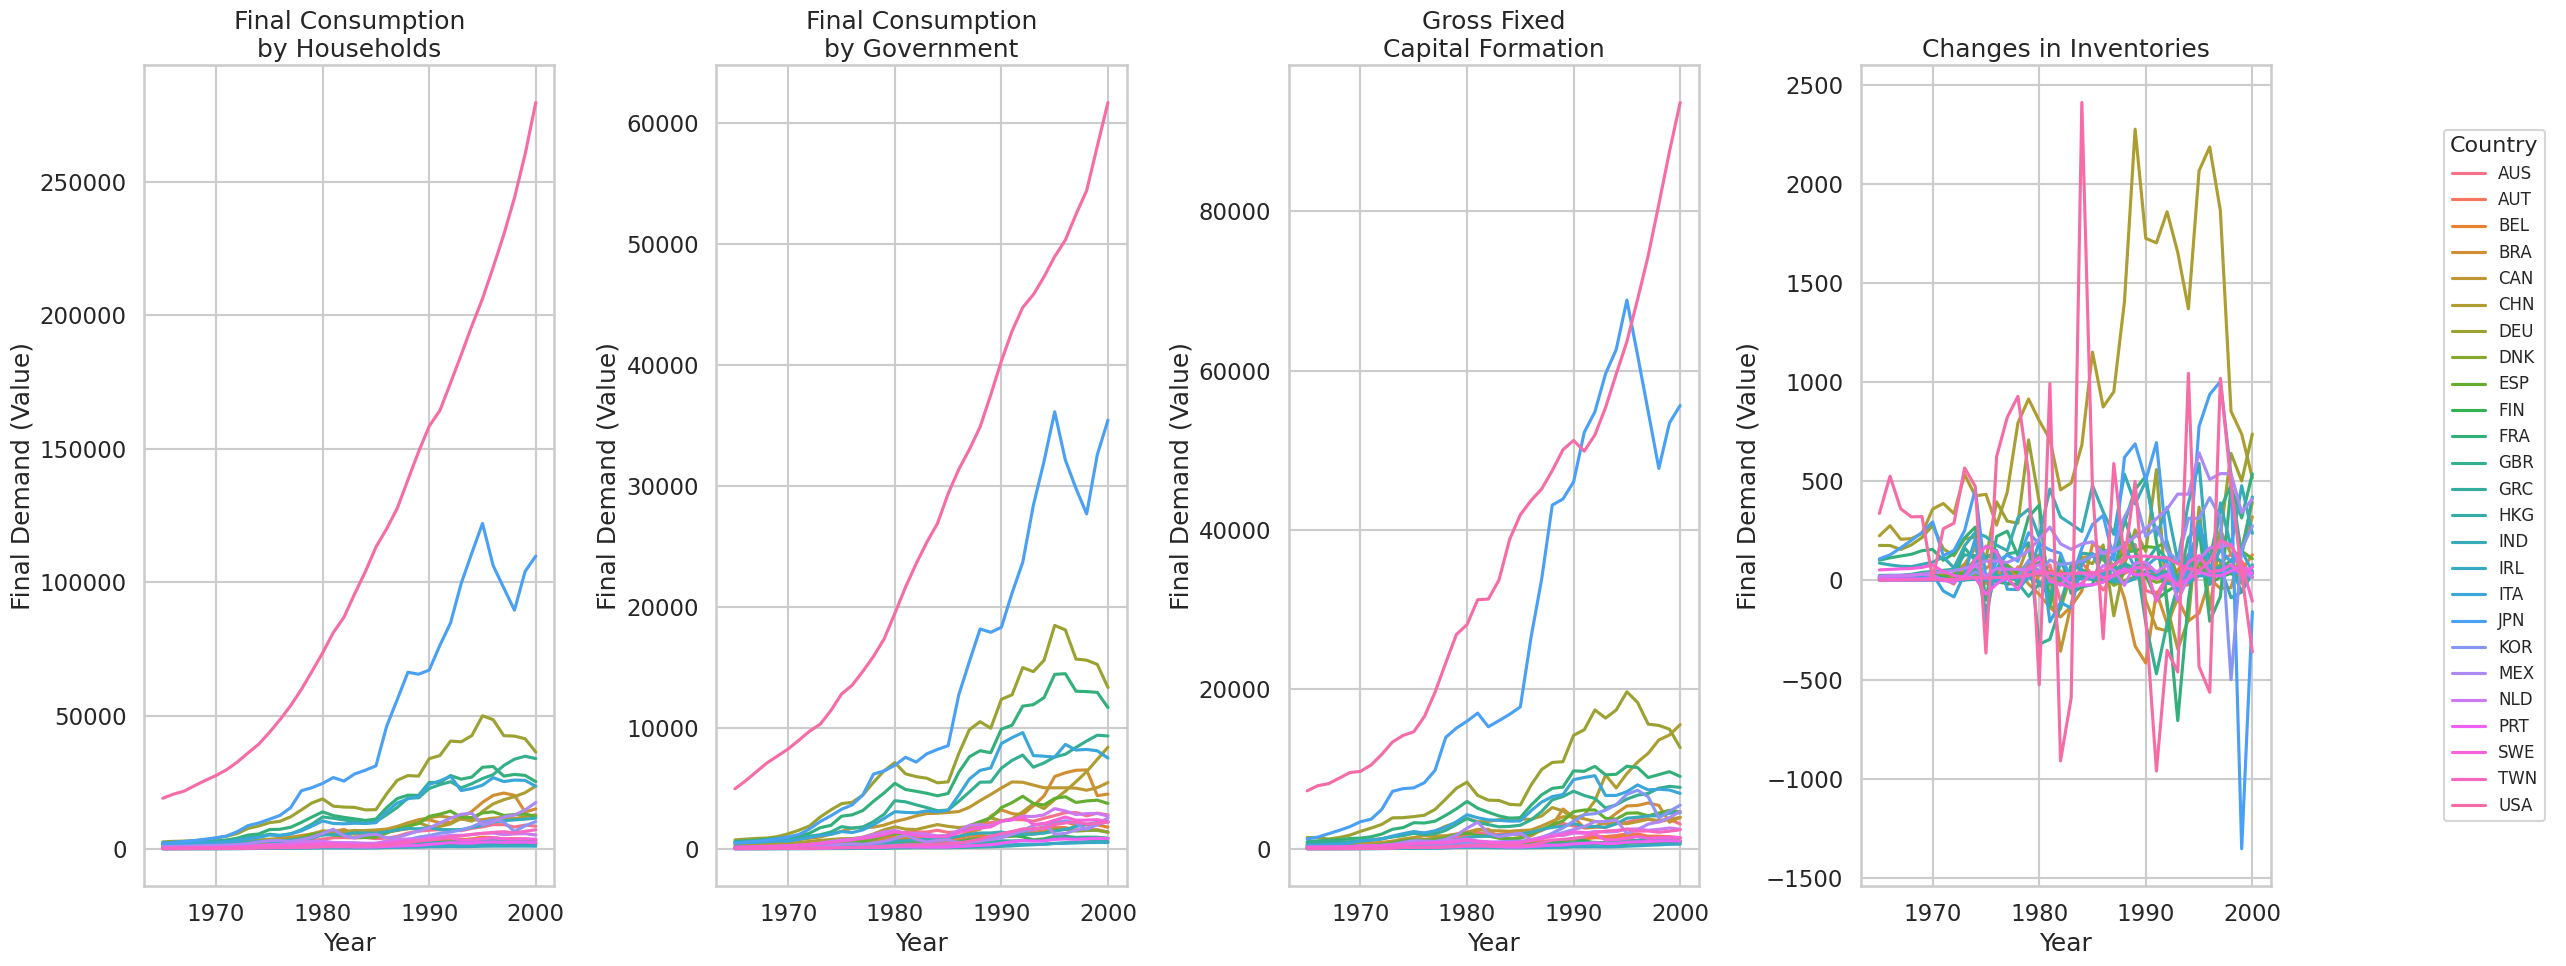

In [ ]:
# #plotting cell
sns.set_theme(style="whitegrid", context="talk")

fig, axes = plt.subplots(1, 5, figsize=(26, 10), gridspec_kw={'width_ratios': [1,1,1,1,0.3]})

for ax, comp in zip(axes[:4], output_components):
    if comp not in components_long["Component"].unique():
        ax.set_visible(False)
        continue

    sns.lineplot(
        data=components_long[components_long["Component"] == comp],
        x="Year", y="Value", hue="Country",
        ax=ax,
        ci=None
    )
    ax.set_title(component_titles.get(comp, comp))
    ax.set_xlabel("Year")
    ax.set_ylabel("Final Demand (Value)")
    ax.get_legend().remove()

# Legend-only axis
axes[-1].axis("off")  # hide the last subplot’s frame
handles, labels = axes[0].get_legend_handles_labels()
axes[-1].legend(
    handles, labels,
    title="Country",
    loc="center",
    fontsize=12,
    title_fontsize=16
)

plt.tight_layout()




/tmp/ipython-input-1500982437.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-1500982437.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-1500982437.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-1500982437.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-1500982437.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-1500982437.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(
/tmp/ipython-input-1500982437.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same eff

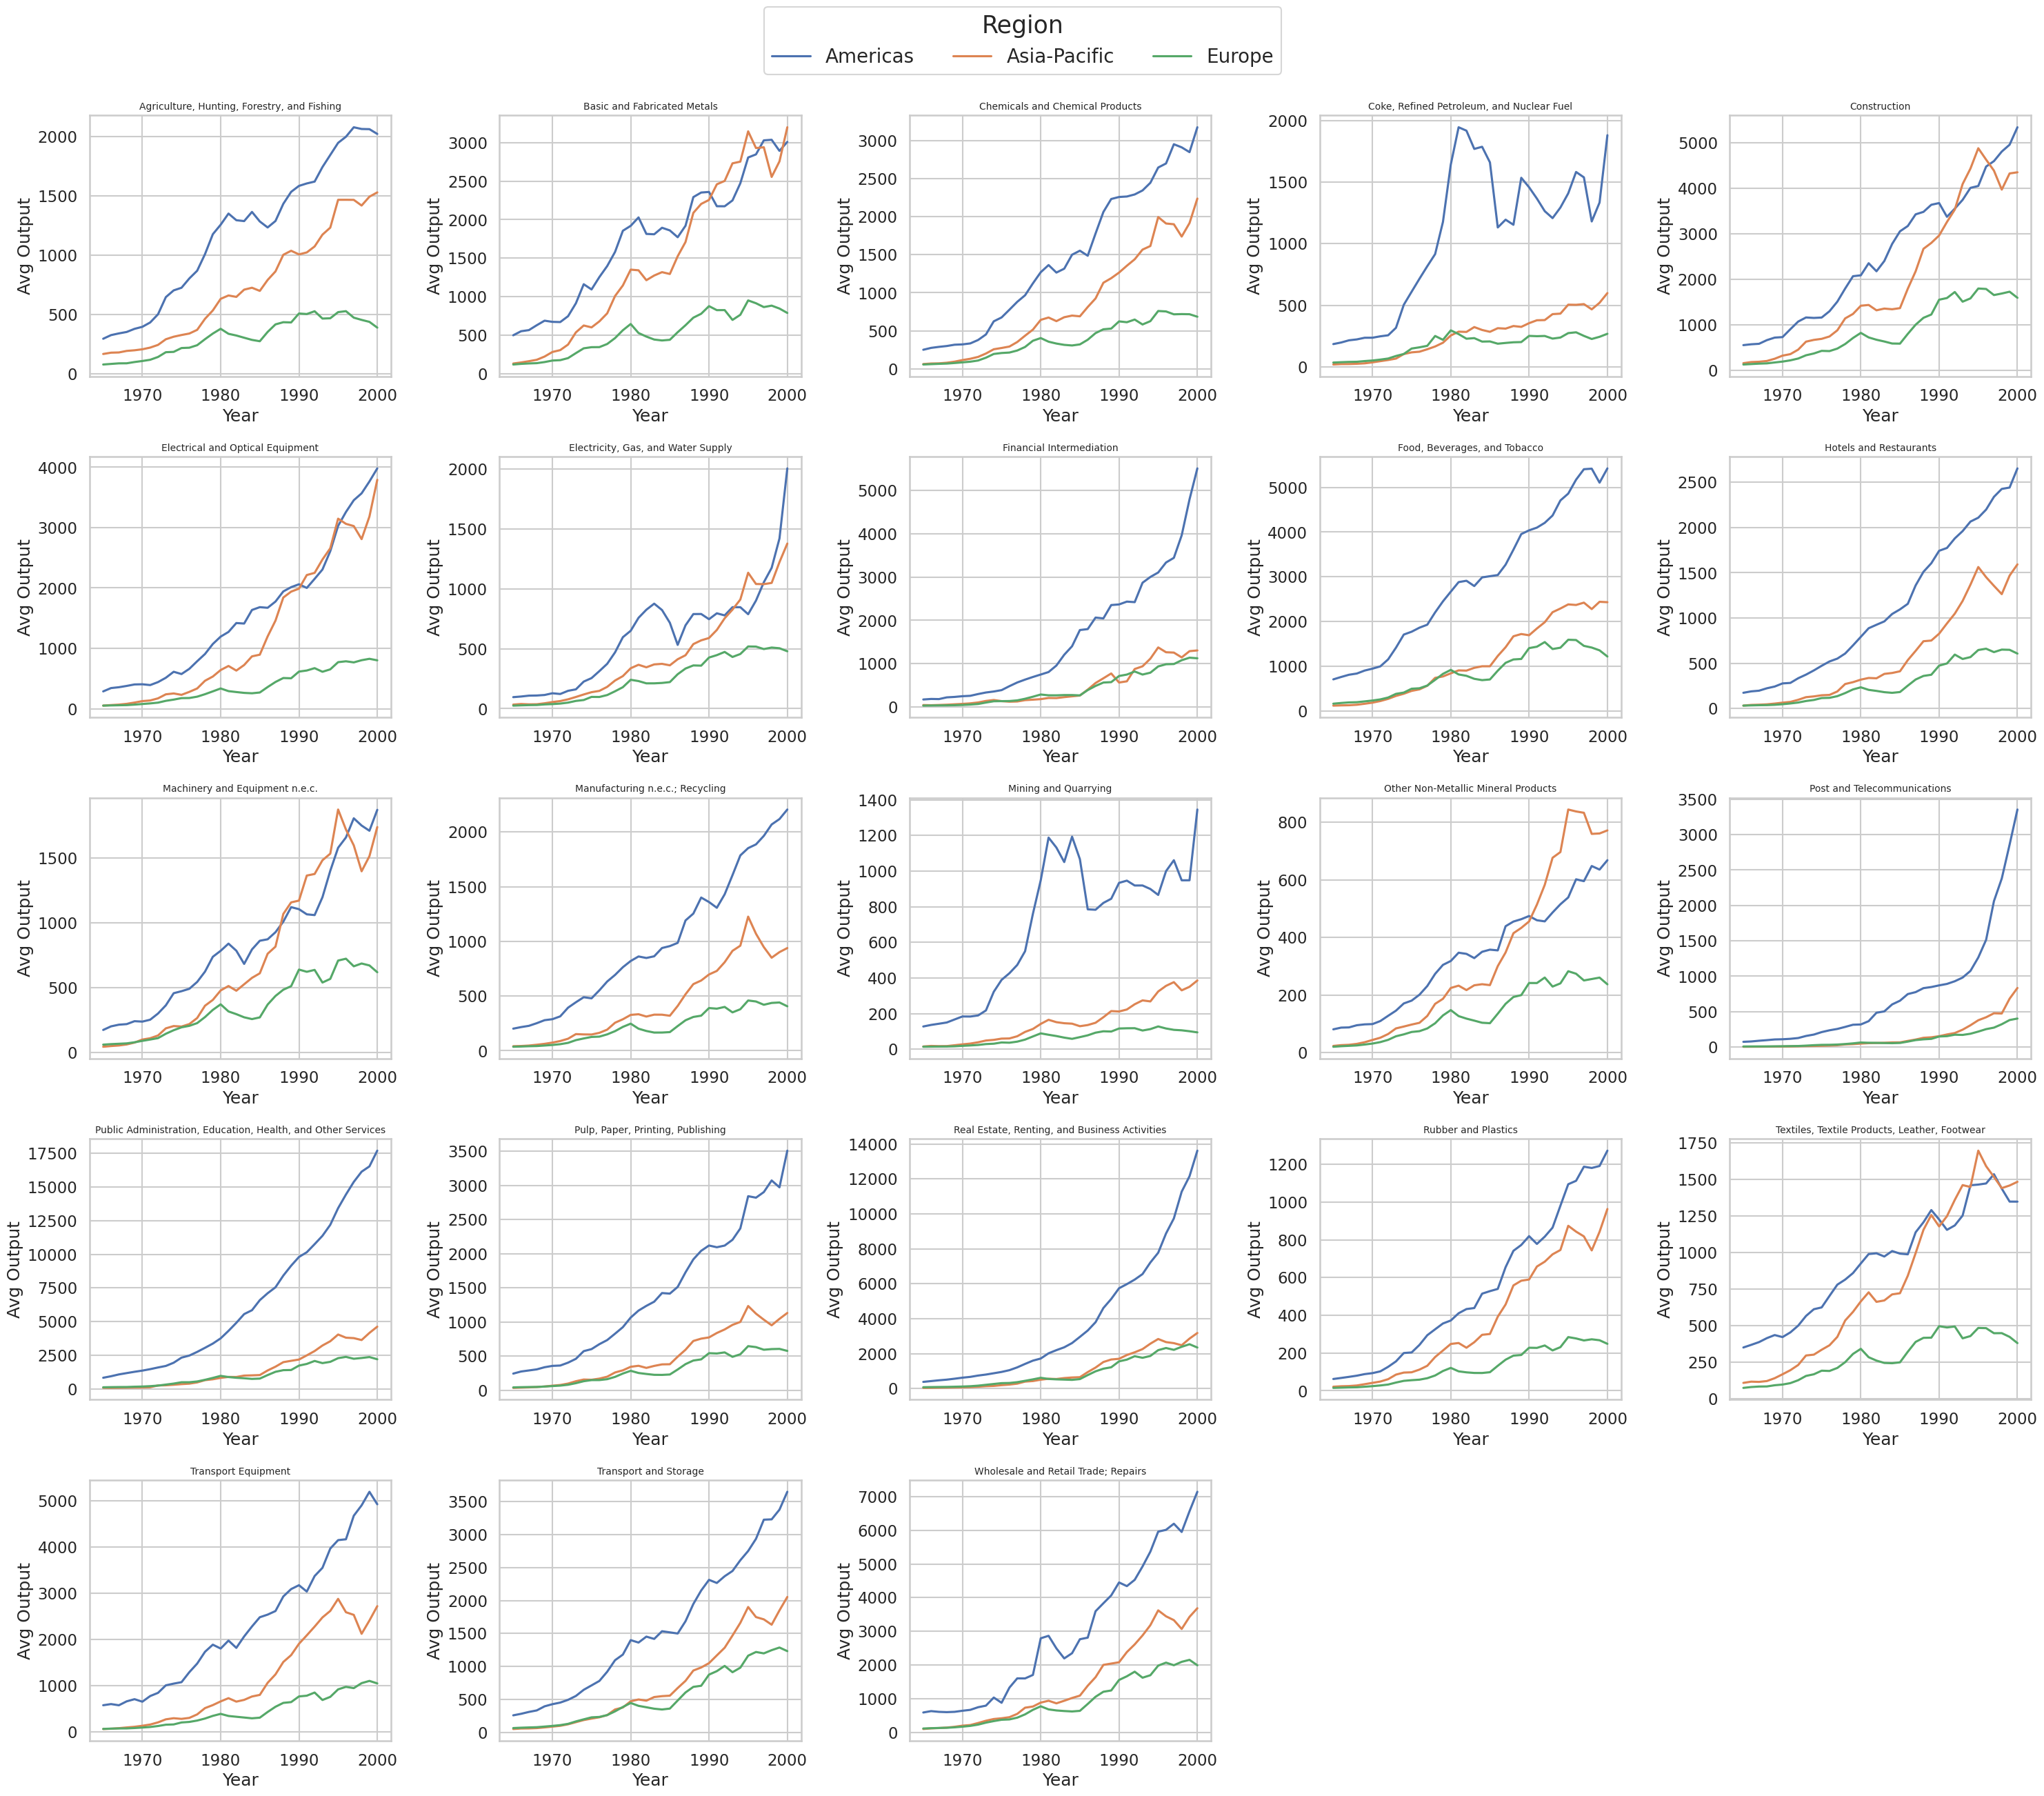

In [ ]:
sns.set_theme(style="whitegrid", context="talk")

sectors = sorted(regional_avg["Sector"].unique())
n_sectors = len(sectors)

# Decide grid size
ncols = 5
nrows = math.ceil(n_sectors / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 5*nrows))
axes = axes.flatten()  # flatten for easy indexing

for i, sector in enumerate(sectors):
    ax = axes[i]
    sns.lineplot(
        data=regional_avg[regional_avg["Sector"] == sector],
        x="Year", y="Value", hue="Region",
        ax=ax,
        ci=None
    )
    ax.set_title(sector, fontsize=10)
    ax.set_xlabel("Year")
    ax.set_ylabel("Avg Output")
    ax.get_legend().remove()  # remove individual legends

# Remove any empty subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Region",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.05),
    ncol=len(labels),
    fontsize=20,
    title_fontsize=25
)

plt.tight_layout()
plt.show()


/tmp/ipython-input-3773710914.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='Region', y='Count', palette='Set2')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/figures/region_count_barplot.pdf'

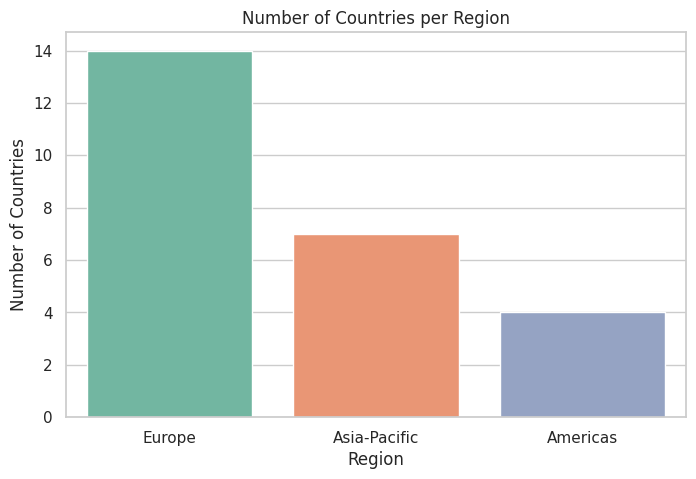

In [ ]:
df_countries = df_all[['Country', 'Region']].drop_duplicates()

# Count countries per region
region_counts = df_countries['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=region_counts, x='Region', y='Count', palette='Set2')
plt.title("Number of Countries per Region")
plt.xlabel("Region")
plt.ylabel("Number of Countries")
output_path = "/content/drive/MyDrive/figures/region_count_barplot.pdf"
plt.savefig(output_path, dpi=300, format='pdf', bbox_inches='tight')


# Midpoints, Extrema for Interactions Plot


In [ ]:
# summary = []

# for country, df_country in country_dfs.items():
#     for year in sorted(df_country["Year"].unique()):
#         year_df = df_country[df_country["Year"] == year]

#         matrix = year_df.iloc[:, 2:]
#         display_matrix = matrix / 1000

#         summary.append({
#             "country": country,
#             "year": year,
#             "median": round(float(np.median(display_matrix.values)), 6),
#             "mean": round(float(np.mean(display_matrix.values)), 6),
#             "min":  round(float(display_matrix.values.min()), 6),
#             "max":  round(float(display_matrix.values.max()), 6),
#         })

# summary_df = pd.DataFrame(summary).sort_values(by=["year", "country"])


# sns.set_theme(style="whitegrid", font="Liberation Serif")

# palette = sns.color_palette("husl", n_colors=len(country_dfs))

# metrics = ["median", "mean", "min", "max"]
# titles = {
#     "median": "Median Intersectoral Flow (Billions USD)",
#     "mean":   "Mean Intersectoral Flow (Billions USD)",
#     "min":    "Minimum Intersectoral Flow (Billions USD)",
#     "max":    "Maximum Intersectoral Flow (Billions USD)"
# }

# fig, axes = plt.subplots(2, 2, figsize=(11, 8))
# print("\nGraph displaying the median, mean, min, and max (in billions) for each country's intersectoral flow matrix from 1965–2000.\n")

# first_ax = axes.flatten()[0]
# sns.lineplot(
#     data=summary_df,
#     x="year", y=metrics[0], hue="country",
#     palette=palette, marker="o", ax=first_ax
# )
# first_ax.set_title(titles[metrics[0]], fontsize=12)
# first_ax.set_xlabel("Year")
# first_ax.set_ylabel("Billions USD")

# handles, labels = first_ax.get_legend_handles_labels()
# first_ax.get_legend().remove()

# for ax, metric in zip(axes.flatten()[1:], metrics[1:]):
#     sns.lineplot(
#         data=summary_df,
#         x="year", y=metric, hue="country",
#         palette=palette, marker="o", ax=ax,
#         legend=False
#     )
#     ax.set_title(titles[metric], fontsize=12)
#     ax.set_xlabel("Year")
#     ax.set_ylabel("Billions USD")

# fig.legend(
#     handles, labels,
#     title="Country",
#     loc="center left",
#     bbox_to_anchor=(.87, 0.5), #.87 super specific to get the legend at that exact position
#     fontsize=8, title_fontsize=10
# )

# plt.tight_layout(rect=[0, 0, 0.85, 1])
# plt.show()



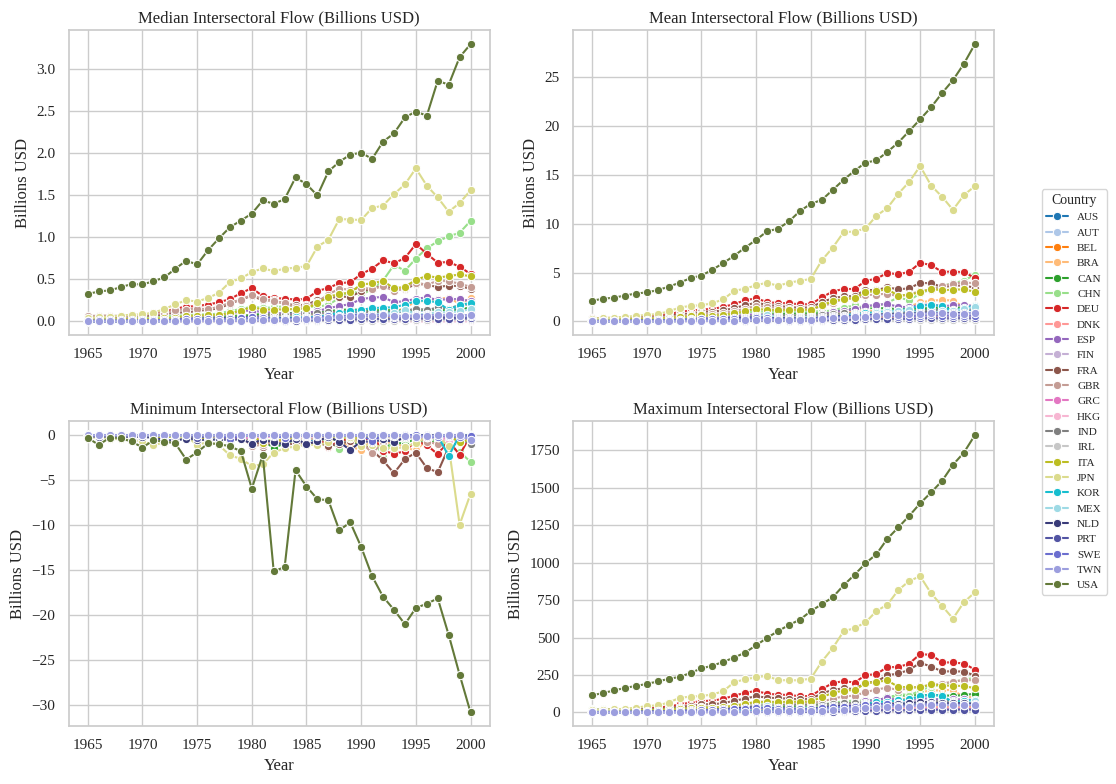

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font="Liberation Serif")

# -----------------------------
# Prepare summary dataframe
# -----------------------------
summary = []

for country, df_country in country_dfs.items():
    for year in sorted(df_country["Year"].unique()):
        year_df = df_country[df_country["Year"] == year]
        matrix = year_df.iloc[:, 2:]
        display_matrix = matrix / 1000  # Convert to billions
        summary.append({
            "country": country,
            "year": year,
            "median": float(np.median(display_matrix.values)),
            "mean":   float(np.mean(display_matrix.values)),
            "min":    float(display_matrix.values.min()),
            "max":    float(display_matrix.values.max()),
        })

summary_df = pd.DataFrame(summary).sort_values(by=["year", "country"])

# -----------------------------
# Create a robust color palette
# -----------------------------
n_countries = len(country_dfs)

# Combine tab20 and tab20b to cover 40 distinct colors
base_palette = list(plt.cm.tab20.colors)
extra_palette = list(plt.cm.tab20b.colors)
palette = base_palette + extra_palette
palette = palette[:n_countries]  # trim to the exact number of countries

# -----------------------------
# Metrics and titles
# -----------------------------
metrics = ["median", "mean", "min", "max"]
titles = {
    "median": "Median Intersectoral Flow (Billions USD)",
    "mean":   "Mean Intersectoral Flow (Billions USD)",
    "min":    "Minimum Intersectoral Flow (Billions USD)",
    "max":    "Maximum Intersectoral Flow (Billions USD)"
}

# -----------------------------
# Create 2x2 subplots
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes_flat = axes.flatten()

# First metric with handles for legend
sns.lineplot(
    data=summary_df,
    x="year", y=metrics[0], hue="country",
    palette=palette, marker="o", ax=axes_flat[0]
)
axes_flat[0].set_title(titles[metrics[0]], fontsize=12)
axes_flat[0].set_xlabel("Year")
axes_flat[0].set_ylabel("Billions USD")

handles, labels = axes_flat[0].get_legend_handles_labels()
axes_flat[0].get_legend().remove()

# Remaining metrics
for ax, metric in zip(axes_flat[1:], metrics[1:]):
    sns.lineplot(
        data=summary_df,
        x="year", y=metric, hue="country",
        palette=palette, marker="o", ax=ax,
        legend=False
    )
    ax.set_title(titles[metric], fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Billions USD")

# -----------------------------
# Add figure-level legend
# -----------------------------
fig.legend(
    handles, labels,
    title="Country",
    loc="center left",
    bbox_to_anchor=(0.87, 0.5),
    fontsize=8,
    title_fontsize=10,
    ncol=1  # one column for better readability with 25+ countries
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space for the legend
plt.show()


# Leontief Pipeline

##Sector Aliases for Display

In [ ]:
#do not delete or comment out

sector_aliases = {
    'Agriculture, Hunting, Forestry, and Fishing': 'Agriculture',
    'Mining and Quarrying': 'Mining',
    'Food, Beverages, and Tobacco': 'FoodBevTobacco',
    'Textiles, Textile Products, Leather, Footwear': 'Textiles',
    'Pulp, Paper, Printing, Publishing': 'PaperPrint',
    'Coke, Refined Petroleum, and Nuclear Fuel': 'Petroleum',
    'Chemicals and Chemical Products': 'Chemicals',
    'Rubber and Plastics': 'RubberPlastics',
    'Other Non-Metallic Mineral Products': 'NonMetalMinerals',
    'Basic and Fabricated Metals': 'Metals',
    'Machinery and Equipment n.e.c.': 'Machinery',
    'Electrical and Optical Equipment': 'Electronics',
    'Transport Equipment': 'TransportEquip',
    'Manufacturing n.e.c.; Recycling': 'ManufacturingOther',
    'Electricity, Gas, and Water Supply': 'Utilities',
    'Construction': 'Construction',
    'Wholesale and Retail Trade; Repairs': 'WholesaleRetail',
    'Hotels and Restaurants': 'Hospitality',
    'Transport and Storage': 'TransportStorage',
    'Post and Telecommunications': 'PostTelecom',
    'Financial Intermediation': 'Finance',
    'Real Estate, Renting, and Business Activities': 'RealEstateBusiness',
    'Public Administration, Education, Health, and Other Services': 'PublicServices'
}

##F1: compute_L()

In [ ]:

# slighlty altered version that works with others in pipeline

def compute_L(country:str, year:int, output_components:list):
  #x=Ax+y
  string = country.upper()
  subset_country = df_all[df_all['Country']==string]
  subset_year = subset_country[subset_country['Year']==year]
  sector_names = subset_year['Sector'].to_list()
  y = subset_year[output_components].sum(axis=1).to_numpy()
  #subset_year.drop(output_components, axis=1, inplace = True)
  Z = subset_year.drop(columns=output_components + ['Year', 'Sector', 'Country', 'Region']).to_numpy() #intermediate matrix with the sectors interactions
  x = Z.sum(axis=0)+y #total demand which is intermediate demands of sectors + final demands of consumption
  A = Z/x[np.newaxis, :]
  I = np.eye(A.shape[0])
  L_matrix = np.linalg.inv(I-A)
  L_labeled = pd.DataFrame(L_matrix, index=sector_names, columns=sector_names)

  #added these to return year, country useful for plotting later
  return L_matrix, L_labeled, year, country_df

In [ ]:
#Computed all the L matrices and stored them, opening here
with open("/content/drive/My Drive/CS439 Final Project/L_matrix_dict.pkl", 'rb') as f:
    L_matrix_dict = pickle.load(f)


##F2: L_avgs()

In [ ]:
def L_avgs(sample_labeled:pd.DataFrame) -> pd.DataFrame:
  """
  computes averages across each row, col, then an average of both (row,col)-
  -for each sector in the sample_labeled df, which is from compute_L()
  intended only for use after compute_L() is called
  returns dataframe "avgs" with cols Row_Avg, Col_Avg, Avg_of_Avgs (average of the two)
  sorted by Avg_of_Avgs, so most interconnected (important) listed first
  2nd fn in L_pipeline()
  """

  #row mean - forward influence, how much other sectors' outputs depend on this sector when facing demand
  #col mean - backward linkage, how much total economy wide output needed to satisfy demand in this sector

  #because each sector has its own row, and is a col for all others, it will contribute to other sectors scores, as other do it
  #so each sector then will have a row mean, col mean

  #avg_of_avgs is the middle point between these two means, because both the row and col means display a sectors importance seperately
  #then the avg of those two is a symetric display of importance altogether

  row_avg = sample_labeled.mean(axis=1)
  col_avg = sample_labeled.mean(axis=0)

  avgs = pd.DataFrame({
      "Row_Avg": row_avg,
      "Col_Avg": col_avg
  })

  avgs['Avg_of_Avgs'] = avgs.mean(axis=1)


  return avgs

##F3: L_avgs_plot()

In [ ]:
def L_avgs_plot(L_country:pd.DataFrame, L_year:int, avgs:pd.DataFrame) -> None:
  """
  takes outputs from compute_L, L_avgs and plots sectors and their avg of avgs
  for the (country, year, avgs) specified
  3rd fn in L_pipeline()
  """

  #have the df, but need the name which is a key in country_dfs
  country = next((k for k, v in country_dfs.items() if v is L_country), None)
  year=L_year

  #x=sector_aliases.values() is from dict defined above for display
  #otherwise x axis is crowded

  font = 'Liberation Serif'
  sns.set_theme(font=font)

  plt.figure(figsize=(12,8))
  sns.barplot(data=avgs, y=sector_aliases.values(), x=avgs['Avg_of_Avgs'])
  plt.title(f"From Leontief Model: Aggregate Mean Scores for Sectors ({country}, {year})")
  plt.xlabel("Average of (Row, Col) Averages per Sector")
  plt.ylabel("Sectors")
  plt.show(block=False)


  print("\n\n")

In [ ]:
country_dfs['USA'].columns

# Leontief


for direct usage by developers, call leontief(). for user interface call
leontief_demo()

##For Dev: leontief()

In [ ]:
# compute_L(), L_avgs, L_avgs_plot() all in a standardized pipeline

def leontief(country_input:str, year_input:int):
  """
  full pipeline where information is passed along at each step-
  -and the user only need specify country, year:
  1. compute_L()
  2. L_avgs()
  3. L_avgs_plot()
  information is passed along, each fn using data from the previous, to show a summary
  of most important sectors for year, country
  """

  sample_matrix, sample_labeled, L_year, L_country = compute_L(
      # country_dfs[country_input],
      country_input,
      year_input,
      output_components
      )

  avgs = L_avgs(sample_labeled)
  L_avgs_plot(L_country, L_year, avgs)


##Example Usage


In [ ]:
# #example usage by querying usa vs for every decade 1970-2000

# #user only needs to know general structure of fn call for this
# # L_pipeline(3 letter country code keys from country_dfs dictionary, year in range 1965-2000)

# for i in range(1970, 2001, 10):
#     leontief("USA", i)
#     leontief("CHN", i)



In [ ]:
#notes on pipeline / future fixes maybe

#avg of avgs is a heuristic, for more rigorous evaluation we may need to use some theory or formula but this heuristic is easily interprettable, good for display
#find a way to sort values wo messing up sector labels
#find way when computing avg of avgs, to ignore diagnal as any sector will have interaction w itself, might inflate relative importance

##Function: leontief_demo()

In [ ]:
def leontief_demo():
    print("Interactive Demonstration:\nShowing Sector Importance by User Specification (Country, Year)\n")

    country_list = ", ".join(country_dfs.keys())
    print(f"Possible Country Query Inputs\n{country_list}")

    c_input = input("\nSelect a Country: ")
    if c_input not in country_dfs.keys():
        raise ValueError("Invalid country code, try again")

    print(f"\nPossible Query Year Inputs: {df['Year'].min()} - {df['Year'].max()}")
    y_input = int(input("\nSelect a Year: "))

    if y_input not in range(1965, 2001):
        raise ValueError("Invalid year, try again")

    print(f"\nCurrent Query:\nCountry: {c_input}\nYear: {y_input}\n")

    # leontief(c_input, y_input)
    leontief(c_input, y_input)


# Heatmap

for direct usage by developers, call heatmap(). for user interface call
heatmap_demo()

##For Dev: heatmap()

In [ ]:
def heatmap(country_code, year, vmin=0, vmax=50):
    """
    Display the interindustry flow matrix as a heatmap for a given country and year,
    using short sector labels.

    Parameters
    ----------
    country_code : str
        The country code key from `country_dfs`, e.g. "USA", "CHN", "GBR"
    year : int
        Year to visualize (must exist in that country's data)
    vmin, vmax : float
        Color scale limits for consistency across plots
    """

    #vmin, vmax set to default [0,50]

    if country_code not in country_dfs:
        raise ValueError(f"'{country_code}' not found. Valid countries: {list(country_dfs.keys())}")

    df_country = country_dfs[country_code]
    if year not in df_country["Year"].values:
        raise ValueError(f"Year {year} not found for {country_code}. "
                         f"Available years: {sorted(df_country['Year'].unique())}")

    year_df = df_country[df_country["Year"] == year]
    matrix = year_df.iloc[:, 2:-4] #cut off the year, sector and the last 4 final demand stats
    display_matrix = matrix / 1000.0


    sectors = year_df["Sector"].replace(sector_aliases).fillna(year_df["Sector"])

    money = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, as_cmap=True)

    plt.figure(figsize=(12, 9))
    sns.heatmap(
        display_matrix,
        cmap=money,
        xticklabels=sectors,
        yticklabels=sectors,
        vmin=vmin, vmax=vmax,
        cbar_kws={'label': 'Billions USD'}
    )

    plt.title(f"{country_code} Interindustry Flow Heatmap ({year})", fontsize=14)
    plt.xlabel("Consuming Sector (Columns)", fontsize=12)
    plt.ylabel("Producing Sector (Rows)", fontsize=12)
    # plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


##For User: heatmap_demo()

In [ ]:
def heatmap_demo():

  print("Interactive Demonstration:\nShowing Heatmap for Sector Interaction (Country, Year)\n")

  print("Default Scale on Coloring Axis is Fixed for Ease of Use, Comparison\n")

  country_list = ", ".join(country_dfs.keys())
  print(f"Possible Country Query Inputs\n{country_list}")
  c_input = input("\nSelect a Country: ")

  if c_input not in country_dfs.keys():
    raise ValueError("Invalid country code, try again")

  print(f"\nPossible Query Year Inputs: {df['Year'].min()} - {df['Year'].max()}")
  y_input = int(input("\nSelect a Year: "))

  if y_input not in range(1965, 2001):
    raise ValueError("Invalid country code, try again")

  print(f"\nCurrent Query:\nCountry: {c_input}\nYear: {y_input}\n")

  heatmap(c_input, y_input)


# Modeling
## KNN data, function, tuning, etc.

## KNN Per Year

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix

In [ ]:
# # Can't have a high k, imbalances in classes will quicikly turn the model into a majority rules thing
# # High dimensionality issues, PCA?
# # Stratify y, ensures the same distribution in both train and test sets (When split up by year, data is small(25 entries))



# #L_matrix_dict

def knn_per_year_data(year: int):
  X=[]
  y=[]
  for country in countries:
    X.append(L_matrix_dict[country][year]['matrix'].flatten())
    y.append(region_map[country])
  scaler = StandardScaler()
  Xs = scaler.fit_transform(X)
  #print(Xs.shape)
  return Xs, y

def tune_k_for_year(year: int):
  X, y = knn_per_year_data(year)
  max_k = len(X)

  knn = KNeighborsClassifier()
  param_grid = {'n_neighbors': range(1, max_k+1), 'weights':['uniform', 'distance']}
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
  grid_search = GridSearchCV(knn, param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  optimal_k = grid_search.best_params_['n_neighbors']
  optimal_weight = grid_search.best_params_['weights']

  return optimal_k, optimal_weight, grid_search, X_train, X_test, y_train, y_test

def fit_evaluate(year:int, n_splits: int = 3):
  optimal_k, optimal_weight, _, X_train, X_test, y_train, y_test = tune_k_for_year(year)
  X, y = knn_per_year_data(year)
  skf = StratifiedKFold(n_splits=min(n_splits, len(y)), shuffle=True, random_state=42)

  knn = KNeighborsClassifier(n_neighbors=optimal_k, weights=optimal_weight)
  knn.fit(X, y)
  y_pred = cross_val_predict(knn, X, y, cv=skf)
  labels = sorted(list(set(y)))

  cm = confusion_matrix(y, y_pred, labels=labels)

  # Plot
  plt.figure(figsize=(8, 6))
  sns.heatmap(
      cm,
      annot=True,
      fmt="d",
      cmap="Blues",
      xticklabels=labels,
      yticklabels=labels
  )
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f"KNN Confusion Matrix — Year {year}\nK={optimal_k}, weights={optimal_weight}")

  return knn, cm

In [ ]:
# # Model Parameter selection for every year maximizing the average CV accuracy
years=df_country["Year"].unique()
n_years = len(years)

ncols = 3
nrows = (n_years + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*5))
# fig, axes = plt.subplots(nrows, ncols, figsize=(12, 7))  # smaller figure for slides

axes = axes.flatten()

for i, year in enumerate(years):
    optimal_k, optimal_weight, grid_search, X_train, X_test, y_train, y_test = tune_k_for_year(year)
    results = grid_search.cv_results_

    k_values = results['param_n_neighbors'].data
    weights = results['param_weights'].data
    mean_scores = results['mean_test_score']

    for w in ['uniform', 'distance']:
        idx = [j for j, wt in enumerate(weights) if wt == w]
        axes[i].plot(
            np.array(k_values)[idx],
            np.array(mean_scores)[idx],
            marker='o',
            label=f"weights={w}"
        )

    axes[i].set_title(f"Year {year}")
    axes[i].set_xlabel("K")
    axes[i].set_ylabel("Mean CV Accuracy")
    axes[i].grid(True)
    axes[i].legend()

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
output_path = "/content/drive/My Drive/CS439 Final Project/knn_results_per_year.png" # LATEX PUT INTO PDF FORMAT output_path = "/content/drive/MyDrive/figures/knn_results_per_year.pdf" plt.savefig(output_path, dpi=300, format='pdf', bbox_inches='tight')
plt.savefig(output_path, dpi=600, bbox_inches='tight')

In [ ]:
fit_evaluate(year = 2000)
fit_evaluate(year = 1977)

Obviously unstable predictions, due to small samples and potentially class imbalences (Model produces reasonable accuracy predicting a large majority 'Europe' Reigon). Also possible explanations are a small sample size in per year data

## KNN on all availible data

Test One Classifier Regardless of Year (Train, apply to per year data to see if it holds?)

In [ ]:
def whole_data(data):
  X = []
  y = []

  for country in countries:
      for year, entry in data[country].items():
          X.append(entry['matrix'].flatten())
          y.append(region_map[country])

  X = np.array(X)
  y = np.array(y)
  scaler = StandardScaler()
  Xs = scaler.fit_transform(X)
  return Xs, y

def tune_k(X, y):
  #X, y = whole_data(data)
  max_k = 70 # half smallest class size

  knn = KNeighborsClassifier()
  param_grid = {'n_neighbors': range(1, max_k+1), 'weights':['uniform', 'distance']}
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  grid_search = GridSearchCV(knn, param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  optimal_k = grid_search.best_params_['n_neighbors']
  optimal_weight = grid_search.best_params_['weights']

  return optimal_k, optimal_weight, grid_search, X_train, X_test, y_train, y_test

def fitting(data):
  X, y = whole_data(data)
  optimal_k, optimal_weight, grid_search, X_train, X_test, y_train, y_test = tune_k(X, y)
  model = KNeighborsClassifier(n_neighbors=optimal_k,
                               weights = optimal_weight,
                               )
  model.fit(X_train, y_train)
  #y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)
  labels=sorted(list(set(y)))

  cm = confusion_matrix(y_test, y_pred, labels=labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f"KNN Confusion Matrix for All Data — \nK={optimal_k}, weights={optimal_weight}")

  return model

In [ ]:
model = fitting(L_matrix_dict)

X, y_real= knn_per_year_data(2000)
y_pred= model.predict(X)
labels = sorted(list(set(y_real)))

cm = confusion_matrix(y_real, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=labels,
              yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"KNN Confusion Matrix for Year 2000— \nK=1, weights=uniform")

X, y_real= knn_per_year_data(1970)
y_pred= model.predict(X)
labels = sorted(list(set(y_real)))

cm = confusion_matrix(y_real, y_pred, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=labels,
              yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"KNN Confusion Matrix for Year 1970— \nK=1, weights=uniform")

# Dimensionality Reduction and KNN

## PCA For all available data

In [ ]:
X, y = whole_data(L_matrix_dict)
_, _, _, X_train, _, _, _ = tune_k(X, y)

In [ ]:
%pip install kneed
from sklearn.decomposition import PCA
from kneed import KneeLocator
pca = PCA()
pca.fit(X_train)

explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

for i, c in enumerate(cumulative[:20]):
    print(i+1, round(c, 4))

max_pcs = min(20, X.shape[1])
explained = pca.explained_variance_ratio_[:max_pcs]
cumulative = np.cumsum(explained)
plt.figure(figsize=(7,4))
pcs = np.arange(1, max_pcs + 1)

# --- Detect elbow with Kneedle ---
kneedle = KneeLocator( pcs, explained, curve="convex", direction="decreasing" )

knee_pc = kneedle.knee
knee_val = kneedle.knee_y
print("Kneedle elbow PC:", knee_pc)
plt.plot(range(1, max_pcs+1), explained, marker='o')
if knee_pc is not None:
  plt.scatter([knee_pc], [knee_val], s=120)
  plt.axvline(knee_pc, linestyle='--')
  plt.xlabel("PC")
  plt.ylabel("Explained Variance")
  plt.title("Scree Plot (first 20 PCs)")
  plt.show() #Elbow point not clear. from ~7-18 PC a plateau ?


In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression

# scores = []
# components = range(2, 21)

# for k in components:
#     pipe = Pipeline([
#         ('pca', PCA(n_components=k)),
#         ('clf', LogisticRegression(max_iter=2000))
#     ])
#     s = cross_val_score(pipe, X, y, cv=5).mean()
#     scores.append(s)

# for k, s in zip(components, scores):
#     print(k, round(s, 4))
# # iterates and stores the logistic regression cross val average accuracy for 2<=k<=20 PC
# # After 18 PC, changes in accuracy diminish.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
def pca(X, y):
  pca = PCA(n_components=5)
  X_reduced = pca.fit_transform(X)
  return X_reduced, y, pca

def fitting_r(data):
  X, y = whole_data(data)
  Xr, y, _ = pca(X, y)
  optimal_k, optimal_weight, grid_search, X_train, X_test, y_train, y_test = tune_k(Xr, y)
  model = KNeighborsClassifier(n_neighbors=optimal_k,
                               weights = optimal_weight,
                               )
  model.fit(X_train, y_train)
  #y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)
  labels=sorted(list(set(y)))

  cm = confusion_matrix(y_test, y_pred, labels=labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f"KNN Confusion Matrix Test Set — \nK={optimal_k}, weights={optimal_weight}")
  # print(f'Train Accuracy{}')
  # print(f'Test Accuracy')
  return model

def plot_pca_clusters_2d(X, y, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        hue=y,
        palette='Set2',
        s=120,
        alpha=0.8
    )

    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.title("2D PCA Visulaization")
    plt.grid(True, alpha=0.3)
    plt.show()
def plot_pca_clusters_3d(X, y, n_components):
    pca = PCA(n_components=n_components)
    X_vis = pca.fit_transform(X)

    fig = plt.figure(figsize=(22, 15))
    ax = fig.add_subplot(111, projection="3d")
    labels, uniques = pd.factorize(y)


    scatter = ax.scatter(
        X_vis[:, 0], X_vis[:, 1], X_vis[:, 2],
        c=labels,
        cmap="Set2",
        s=80
    )
    colors = scatter.cmap(scatter.norm(range(len(uniques))))
    legend_handles = [
      mpatches.Patch(color=colors[i], label=str(uniques[i]))
      for i in range(len(uniques))
    ]
    ax.legend(handles=legend_handles, title="Classes")
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
    ax.set_title(f"3D PCA Visualization", fontsize = 20)
    plt.show()

# Using accuracy to tune, PC = 18
# Using Variance (Kneedle point) to tune, PC = 4

In [ ]:
plot_pca_clusters_2d(X, y, 4)
plot_pca_clusters_3d(X, y, 4)

In [ ]:
reduced_knn = fitting_r(L_matrix_dict)

In [ ]:
X2000, y2000= knn_per_year_data(2000)
model = reduced_knn.fit(X2000, y2000)
y2000pred= model.predict(X2000)
cm=confusion_matrix(y2000, y2000pred)
labels=sorted(list(set(y2000)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=labels,
              yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"KNN (PCA) Confusion Matrix on 2000 data")

Next step, maybe build a function where you fit this model for every year and show confusion matrix for every year see how it performs

# Decision Tree Classifier (Understand Structures of Regional Economies)

Already shown classification of region is fairly successful with KNN

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#Decision tree for interpretability
# data- df_all (df_all.head())

In [ ]:
years = sorted(df_country["Year"].unique())

def tree_data(L_matrix_dict):
    rows = []
    labels = []

    for year in years:
        for country in countries:


            L_df = L_matrix_dict[country][year]['labeled']  # a DataFrame

            # Flatten into 1D vector BUT preserve feature names
            flat = L_df.stack() # Allows you to preserve the index names while also flattening the matrix into 1x529 (23*23)
            flat.index = [f"{i}->{j}" for i, j in flat.index]  # rename features (Sector 'row' -> Sector 'col')

            rows.append(flat)
            labels.append(region_map[country])

    # Convert list of Series → DataFrame
    X = pd.DataFrame(rows)
    y = pd.Series(labels, name="region")
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)
    return Xs, y, X
def tune_tree(X, y):
  # Grid of parameters
  param_grid = {
      'max_depth': [3, 4, 5, 6],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'criterion': ['gini', 'entropy']
  }

  tree = DecisionTreeClassifier(random_state=42)
  grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X, y)

  best_depth = grid_search.best_params_['max_depth']
  best_min_split = grid_search.best_params_['min_samples_split']
  best_min_leaf = grid_search.best_params_['min_samples_leaf']
  best_criterion = grid_search.best_params_['criterion']

  return best_depth, best_min_split, best_min_leaf, best_criterion

In [ ]:
X, y, X_df = tree_data(L_matrix_dict)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
best_depth, best_min_split, best_min_leaf, best_criterion = tune_tree(X_train, y_train)
tree = DecisionTreeClassifier(
    max_depth=best_depth,
    min_samples_split = best_min_split,
    min_samples_leaf=best_min_leaf,
    criterion = best_criterion,
    class_weight="balanced"
)
tree.fit(X_train, y_train)
imp = tree.feature_importances_
idx = np.argsort(imp)[::-1][:20]   # top 20 features

plt.figure(figsize=(10,6))
plt.barh([X_df.columns[i] for i in idx], imp[idx])
plt.title("Top 20 Most Important Sector-to-Sector Flows")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn import tree as sktree

#import matplotlib.pyplot as plt

plt.figure(figsize=(65, 35))
sktree.plot_tree(
    tree,
    feature_names=X_df.columns,
    class_names=tree.classes_,
    filled=True,
    fontsize=10,
    rounded=True
)
plt.title(f"Decision Tree \nDepth = {tree.get_depth()}, leaves = {tree.get_n_leaves()}", fontsize=50)
plt.show()


In [ ]:
plt.figure(figsize=(65,35))  # Larger figure for slides
sktree.plot_tree(
              tree,
               max_depth=2,      # Only top 2 levels
               feature_names=X_df.columns,
               class_names=tree.classes_,
               filled=True,
               rounded=True,
               fontsize=25)
plt.title(f"Decision Tree \nDepth = {tree.get_depth()}, leaves = {tree.get_n_leaves()}", fontsize=50)
plt.show()

In [ ]:
# Overfit check, Train Accuracy high but so is test accuracy probably not overfit, makes sense intuitively as well
# since KNN was able to successfully classify with high accuracy as well.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
# tree.fit(X_train, y_train)

train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

Write text to summarize the tree splits to understand the regional economies

# Train classifier on first 25 years to see if results hold up for next 10 years

In [ ]:
def subset_year_data(data):
    subset_years = set(range(1965, 1991))   # training years

    X_train, y_train, train_meta = [], [], []
    X_eval, y_eval, eval_meta = [], [], []

    for country in data.keys():
        for year in data[country].keys():
            vec = data[country][year]['matrix'].flatten()
            label = region_map[country]

            if year in subset_years:
                X_train.append(vec)
                y_train.append(label)
                train_meta.append((country, year))
            else:
                X_eval.append(vec)
                y_eval.append(label)
                eval_meta.append((country, year))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_eval = np.array(X_eval)
    y_eval = np.array(y_eval)

    # scale using training only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_eval_scaled = scaler.transform(X_eval)

    return X_train_scaled, y_train, train_meta, X_eval_scaled, y_eval, eval_meta

def subset_year_tune_k(X_train, y_train):
    max_k = 70

    knn = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': range(1, max_k+1),
        'weights': ['uniform', 'distance']
    }

    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    return (
        grid_search.best_params_['n_neighbors'],
        grid_search.best_params_['weights'],
        grid_search
    )


def subset_year_fitting(data):
    # Load processed data
    X_train, y_train, train_meta, X_eval, y_eval, eval_meta = subset_year_data(data)

    optimal_k, optimal_weight, grid_search = subset_year_tune_k(X_train, y_train)

    model = KNeighborsClassifier(
        n_neighbors=optimal_k,
        weights=optimal_weight
    )
    model.fit(X_train, y_train)

    # Evaluate on FUTURE years
    y_pred = model.predict(X_eval)

    # Confusion matrix
    labels=sorted(list(set(y_train)))
    cm = confusion_matrix(y_eval, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KNN Future Years Confusion Matrix — K={optimal_k}, weights={optimal_weight}")
    plt.show()

    # Overfit check
    train_pred = model.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, train_pred))
    print("Test Accuracy:", accuracy_score(y_eval, y_pred))

    # ---- MISCLASSIFIED SAMPLES ----
    misclassified = []
    for i, (true, pred) in enumerate(zip(y_eval, y_pred)):
        if true != pred:
            country, year = eval_meta[i]
            misclassified.append({
                "Country": country,
                "Year": year,
                "True Region": true,
                "Predicted Region": pred
            })

    misclassified_df = pd.DataFrame(misclassified)
    print("\nMisclassified future-year cases:")
    display(misclassified_df)

    return model, misclassified_df


In [ ]:
model = subset_year_fitting(L_matrix_dict)

# X, y_real= knn_per_year_data(2000)
# y_pred= model.predict(X)
# cm=confusion_matrix(y_real, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#               xticklabels=list(set(y_test)),
#               yticklabels=list(set(y_test)))
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title(f"KNN Confusion Matrix — \nK=1, weights=uniform")

Will Feature reduction help?

## PCA for subset Years

In [ ]:
X_train, _, _, _, _, _= subset_year_data(L_matrix_dict)

In [ ]:
pca = PCA()
pca.fit(X_train)

explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

for i, c in enumerate(cumulative[:20]):
    print(i+1, round(c, 4))

max_pcs = min(20, X_train.shape[1])
explained = pca.explained_variance_ratio_[:max_pcs]
cumulative = np.cumsum(explained)
plt.figure(figsize=(7,4))
pcs = np.arange(1, max_pcs + 1)

# --- Detect elbow with Kneedle ---
kneedle = KneeLocator(pcs, explained, curve="convex", direction="decreasing" )

knee_pc = kneedle.knee
knee_val = kneedle.knee_y
print("Kneedle elbow PC:", knee_pc)
plt.plot(range(1, max_pcs+1), explained, marker='o')
if knee_pc is not None:
  plt.scatter([knee_pc], [knee_val], s=120)
  plt.axvline(knee_pc, linestyle='--')
  plt.xlabel("PC")
  plt.ylabel("Explained Variance")
  plt.title("Scree Plot (first 20 PCs)")
  plt.show()


In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression

# scores = []
# components = range(2, 21)

# for k in components:
#     pipe = Pipeline([
#         ('pca', PCA(n_components=k)),
#         ('clf', LogisticRegression(max_iter=2000))
#     ])
#     s = cross_val_score(pipe, X, y, cv=5).mean()
#     scores.append(s)

# for k, s in zip(components, scores):
#     print(k, round(s, 4))
# # iterates and stores the logistic regression cross val average accuracy for 2<=k<=20 PC
# # After 18 PC, changes in accuracy diminish.

In [ ]:
def subset_year_data_pca(data):
    subset_years = set(range(1965, 1991))   # training years

    X_train, y_train, train_meta = [], [], []
    X_eval, y_eval, eval_meta = [], [], []

    for country in data.keys():
        for year in data[country].keys():
            vec = data[country][year]['matrix'].flatten()
            label = region_map[country]

            if year in subset_years:
                X_train.append(vec)
                y_train.append(label)
                train_meta.append((country, year))
            else:
                X_eval.append(vec)
                y_eval.append(label)
                eval_meta.append((country, year))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_eval = np.array(X_eval)
    y_eval = np.array(y_eval)

    # scale using training only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_eval_scaled = scaler.transform(X_eval)

    # dimension reduction
    pca = PCA(n_components=7)
    X_train_pc = pca.fit_transform(X_train_scaled)
    X_eval_pc = pca.transform(X_eval_scaled)
    return X_train_pc, y_train, train_meta, X_eval_pc, y_eval, eval_meta, pca

def subset_year_fitting_pca(data):
    # Load processed data
    X_train, y_train, train_meta, X_eval, y_eval, eval_meta, pca = subset_year_data_pca(data)

    optimal_k, optimal_weight, grid_search = subset_year_tune_k(X_train, y_train)

    model = KNeighborsClassifier(
        n_neighbors=optimal_k,
        weights=optimal_weight
    )
    model.fit(X_train, y_train)

    # Evaluate on FUTURE years
    y_pred = model.predict(X_eval)

    # Confusion matrix
    labels=sorted(list(set(y_train)))
    cm = confusion_matrix(y_eval, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KNN Future Years Confusion Matrix — K={optimal_k}, weights={optimal_weight}")
    plt.show()

    # Overfit check
    train_pred = model.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, train_pred))
    print("Test Accuracy:", accuracy_score(y_eval, y_pred))

    # MISCLASSIFIED SAMPLES
    misclassified = []
    for i, (true, pred) in enumerate(zip(y_eval, y_pred)):
        if true != pred:
            country, year = eval_meta[i]
            misclassified.append({
                "Country": country,
                "Year": year,
                "True Region": true,
                "Predicted Region": pred
            })

    misclassified_df = pd.DataFrame(misclassified)
    print("\nMisclassified future-year cases:")
    display(misclassified_df)
    print("\n=== Confusion Matrix Metrics (Future Years Evaluation) ===")
    print("Accuracy:", accuracy_score(y_eval, y_pred))
    print("Precision (macro):", precision_score(y_eval, y_pred, average='macro', zero_division=0))
    print("Recall (macro):", recall_score(y_eval, y_pred, average='macro', zero_division=0))
    print("F1 Score (macro):", f1_score(y_eval, y_pred, average='macro', zero_division=0))
    print("---------------------------------------------------------\n")
    return model, misclassified_df


In [ ]:
X, y = whole_data(L_matrix_dict)
plot_pca_clusters_2d(X, y, 7)
plot_pca_clusters_3d(X, y, 7)

In [ ]:
reduced_model, misclass = subset_year_fitting_pca(L_matrix_dict)

# Optimal model classifying future years is way worse with the PCA on features

In [ ]:
# _df_20.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)
# plt.title("KNN reduced Future Years Misclassified Countries", fontsize = 18)

# Leave Out Countries in Training, then test classifier
## Infeasible due to small samples

# Unsupervised Clustering

## Whole data fitted clustering

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import mode
def fit_clustering(data, n_clusters=3, random_state=42):
    X, y = whole_data(data)
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(X)

    cluster_ids = model.fit_predict(X) #returns array of predictions (cluster #) for each sample

    cluster_to_label = {} #store cluster names
    for c in range(n_clusters):
        cluster_labels = y[cluster_ids == c] #for each cluster, attach all the labels in the cluster
        if len(cluster_labels) > 0:
          vals, counts = np.unique(cluster_labels, return_counts=True)
          cluster_to_label[c] = vals[np.argmax(counts)]
            # cluster_to_label[c] = mode(cluster_labels)[0][0]  #find the mode of each cluster's region, error, mode needs to be numeric now
        else:
            cluster_to_label[c] = None  # empty cluster

    mapped = [cluster_to_label[c] for c in cluster_ids] # store them in a list

    labels_sorted = sorted(set(y))
    cm = confusion_matrix(y, mapped, labels=labels_sorted)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_sorted,
                yticklabels=labels_sorted)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KMeans Confusion Matrix (K={n_clusters})- Whole Data")
    plt.show()

    return model, cluster_to_label

def fit_subset_clustering(data, n_clusters=3, random_state=42):
    X_train_scaled, y_train, train_meta, X_eval_scaled, y_eval, eval_meta = subset_year_data(data)
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(X_train_scaled)

    cluster_ids = model.fit_predict(X_eval_scaled) #returns array of predictions (cluster #) for each sample

    cluster_to_label = {} #store cluster names
    for c in range(n_clusters):
        cluster_labels = y_eval[cluster_ids == c] #for each cluster, attach all the labels in the cluster
        if len(cluster_labels) > 0:
          vals, counts = np.unique(cluster_labels, return_counts=True)
          cluster_to_label[c] = vals[np.argmax(counts)]
            # cluster_to_label[c] = mode(cluster_labels)[0][0]  #find the mode of each cluster's region, error, mode needs to be numeric now
        else:
            cluster_to_label[c] = None  # empty cluster

    mapped = [cluster_to_label[c] for c in cluster_ids] # store them in a list

    labels_sorted = sorted(set(y_eval))
    cm = confusion_matrix(y_eval, mapped, labels=labels_sorted)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_sorted,
                yticklabels=labels_sorted)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KMeans Confusion Matrix (K={n_clusters})- Subset Year")
    plt.show()

    return model, cluster_to_label

In [ ]:
clustering, labels = fit_clustering(L_matrix_dict)
model2, label = fit_subset_clustering(L_matrix_dict)

Not sensitive at all to Americas class, predicting Europe very heavily (class imbalance)?

## Clustering whole data reduced

PCA PC's for data again is the same as previously investigated
- whole data = 4
- subsetted data = 7

In [ ]:
def pca_whole(X, y):
  pca = PCA(n_components=4)
  X_reduced = pca.fit_transform(X)
  return X_reduced, y, pca

def pca_subset(X, y):
  pca = PCA(n_components=7)
  X_reduced = pca.fit_transform(X)
  return X_reduced, y, pca

In [ ]:
def fit_reduced_clustering(data, n_clusters=3, random_state=42):
    X, y = whole_data(data)
    Xr, y, _ = pca_whole(X, y)
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(Xr)

    cluster_ids = model.fit_predict(X) #returns array of predictions (cluster #) for each sample

    cluster_to_label = {} #store cluster names
    for c in range(n_clusters):
        cluster_labels = y[cluster_ids == c] #for each cluster, attach all the labels in the cluster
        if len(cluster_labels) > 0:
          vals, counts = np.unique(cluster_labels, return_counts=True)
          cluster_to_label[c] = vals[np.argmax(counts)]
            # cluster_to_label[c] = mode(cluster_labels)[0][0]  #find the mode of each cluster's region, error, mode needs to be numeric now
        else:
            cluster_to_label[c] = None  # empty cluster

    mapped = [cluster_to_label[c] for c in cluster_ids] # store them in a list

    labels_sorted = sorted(set(y))
    cm = confusion_matrix(y, mapped, labels=labels_sorted)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_sorted,
                yticklabels=labels_sorted)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KMeans Confusion Matrix (K={n_clusters})- Whole Data Reduced")
    plt.show()

    return model, cluster_to_label

def fit_subset_reduced_clustering(data, n_clusters=3, random_state=42):
    X_train_scaled, y_train, train_meta, X_eval_scaled, y_eval, eval_meta = subset_year_data(data)
    Xr, yT, _ = pca_subset(X_train_scaled, y_train)
    X_eval_r, y_eval, _ = pca_subset(X_eval_scaled, y_eval)
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(Xr)

    cluster_ids = model.fit_predict(X_eval_r) #returns array of predictions (cluster #) for each sample

    cluster_to_label = {} #store cluster names
    for c in range(n_clusters):
        cluster_labels = y_eval[cluster_ids == c] #for each cluster, attach all the labels in the cluster
        if len(cluster_labels) > 0:
          vals, counts = np.unique(cluster_labels, return_counts=True)
          cluster_to_label[c] = vals[np.argmax(counts)]
            # cluster_to_label[c] = mode(cluster_labels)[0][0]  #find the mode of each cluster's region, error, mode needs to be numeric now
        else:
            cluster_to_label[c] = None  # empty cluster

    mapped = [cluster_to_label[c] for c in cluster_ids] # store them in a list

    labels_sorted = sorted(set(y_eval))
    cm = confusion_matrix(y_eval, mapped, labels=labels_sorted)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_sorted,
                yticklabels=labels_sorted)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KMeans Confusion Matrix (K={n_clusters})- Subset Year Reduced")
    plt.show()

    return model, cluster_to_label

In [ ]:
model3, labels = fit_reduced_clustering(L_matrix_dict)
model4, labels = fit_subset_reduced_clustering(L_matrix_dict)

Raw clustering into 3 groups is not super sensitive. Doesn't mean that it's impossible either, may just require more specific breakdowns and groupings (ie east asia, eurasia, west europe, north america, ..). Our data does have limitations in this aspect, as shown in our EDA. Theoretically, if we were able to separate these 3 regions well, the class imbalances should be negligible (majority class should be able to group well) However, in a way, we can also kind of see separation between Asia-Pacific and the Americas. Would there be a good way to differentiate East (Asia-Pacific) and West (Americas & Europe)?

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

optimal_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print("Optimal k by silhouette:", optimal_k)

#Sillhouette scores also kinds of supprots this thesis of being able to split the two East, West regions.
#Australia is considered geographically on the east but abstract political science definitions has them in the west. Will account for both types in running the clustering
#Also, South America is another continent heavily debated, whether it's part of the western world. Due to high amounts of European settlement and influence, I will include them as 'Western'

# Two Classes: East/West


In [ ]:
region_map = {
    'USA': 'Americas',
    'CAN': 'Americas',
    'MEX': 'Americas',
    'AUT': 'Europe',
    'BEL': 'Europe',
    'DEU': 'Europe',
    'DNK': 'Europe',
    'ESP': 'Europe',
    'FIN': 'Europe',
    'FRA': 'Europe',
    'GBR': 'Europe',
    'GRC': 'Europe',
    'IRL': 'Europe',
    'ITA': 'Europe',
    'NLD': 'Europe',
    'PRT': 'Europe',
    'SWE': 'Europe',
    'AUS': 'Asia-Pacific',
    'CHN': 'Asia-Pacific',
    'HKG': 'Asia-Pacific',
    'IND': 'Asia-Pacific',
    'JPN': 'Asia-Pacific',
    'KOR': 'Asia-Pacific',
    'TWN': 'Asia-Pacific',
    'BRA': 'Americas'
}

geographic_map= {
    'USA': 'Western',
    'CAN': 'Western',
    'MEX': 'Western',
    'AUT': 'Western',
    'BEL': 'Western',
    'DEU': 'Western',
    'DNK': 'Western',
    'ESP': 'Western',
    'FIN': 'Western',
    'FRA': 'Western',
    'GBR': 'Western',
    'GRC': 'Western',
    'IRL': 'Western',
    'ITA': 'Western',
    'NLD': 'Western',
    'PRT': 'Western',
    'SWE': 'Western',
    'AUS': 'Eastern',
    'CHN': 'Eastern',
    'HKG': 'Eastern',
    'IND': 'Eastern',
    'JPN': 'Eastern',
    'KOR': 'Eastern',
    'TWN': 'Eastern',
    'BRA': 'Western'
}

override_map = {
    'AUS': 'Western'
}
def get_political_region(country):
    # Use override first
    if country in override_map:
        return override_map[country]
    # Otherwise use geographic map
    else:
      return geographic_map[country]


In [ ]:
counts_g = {}
counts_p = {}
for country in geographic_map:
    region_p = get_political_region(country)
    region_g = geographic_map[country]
    counts_g[region_g] = counts_g.get(region_g, 0) + 1
    counts_p[region_p]=counts_p.get(region_p, 0) + 1

# Plot
plt.figure(figsize=(8, 5))
plt.bar(list(counts_g.keys()), list(counts_g.values()))
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Country Counts by Geographic Region")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(list(counts_p.keys()), list(counts_p.values()))
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Country Counts by Political Region")
plt.tight_layout()
plt.show()

## KNN whole data: East and West (both political and geographic)

In [ ]:
def whole_data2(data, ytype):
  X = []
  y = []

  for country in countries:
      for year, entry in data[country].items():
          X.append(entry['matrix'].flatten())
          #y.append(region_map[country])
          if ytype== 'geographic':
            y.append(geographic_map[country])
          elif ytype== 'political':
            y.append(get_political_region(country))

  X = np.array(X)
  y = np.array(y)
  scaler = StandardScaler()
  Xs = scaler.fit_transform(X)
  return Xs, y

def tune_k(X, y):
  #X, y = whole_data(data)
  max_k = 70 # half smallest class size

  knn = KNeighborsClassifier()
  param_grid = {'n_neighbors': range(1, max_k+1), 'weights':['uniform', 'distance']}
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  grid_search = GridSearchCV(knn, param_grid, cv=5)
  grid_search.fit(X_train, y_train)

  optimal_k = grid_search.best_params_['n_neighbors']
  optimal_weight = grid_search.best_params_['weights']

  return optimal_k, optimal_weight, grid_search, X_train, X_test, y_train, y_test

def fitting(data, ytype):
  X, y = whole_data2(data, ytype)
  optimal_k, optimal_weight, grid_search, X_train, X_test, y_train, y_test = tune_k(X, y)
  model = KNeighborsClassifier(n_neighbors=optimal_k,
                               weights = optimal_weight,
                               )
  model.fit(X_train, y_train)
  #y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)
  labels=sorted(list(set(y)))

  cm = confusion_matrix(y_test, y_pred, labels=labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f"KNN Confusion Matrix for All Data — {ytype} \nK={optimal_k}, weights={optimal_weight}")

  return model

In [ ]:
political_class = fitting(L_matrix_dict, 'political')
geographic_class = fitting(L_matrix_dict, 'geographic')

In [ ]:
# # X, y = whole_data2(L_matrix_dict, 'political') #Political optimal PC: 4
# # X, y = whole_data2(L_matrix_dict, 'geographic') #Geographic optimal PC: 4
# _, _, _, X_train, _, _, _ = tune_k(X, y)

# pca = PCA()
# pca.fit(X_train)

# explained = pca.explained_variance_ratio_
# cumulative = np.cumsum(explained)

# for i, c in enumerate(cumulative[:20]):
#     print(i+1, round(c, 4))

# max_pcs = min(20, X.shape[1])
# explained = pca.explained_variance_ratio_[:max_pcs]
# cumulative = np.cumsum(explained)
# plt.figure(figsize=(7,4))
# pcs = np.arange(1, max_pcs + 1)

# # --- Detect elbow with Kneedle ---
# kneedle = KneeLocator( pcs, explained, curve="convex", direction="decreasing" )

# knee_pc = kneedle.knee
# knee_val = kneedle.knee_y
# print("Kneedle elbow PC:", knee_pc)
# plt.plot(range(1, max_pcs+1), explained, marker='o')
# if knee_pc is not None:
#   plt.scatter([knee_pc], [knee_val], s=120)
#   plt.axvline(knee_pc, linestyle='--')
#   plt.xlabel("PC")
#   plt.ylabel("Explained Variance")
#   plt.title("Scree Plot (first 20 PCs)")
#   plt.show() #Elbow point not clear. from ~7-18 PC a plateau ?


## PCA For whole data

In [ ]:
def plot_pca_clusters_2d(X, y, ytype, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x=X_pca[:, 0],
        y=X_pca[:, 1],
        hue=y,
        palette='Set2',
        s=120,
        alpha=0.8
    )

    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    plt.title(f"2D PCA Visulaization- {ytype}")
    plt.grid(True, alpha=0.3)
    plt.show()
def plot_pca_clusters_3d(X, y, ytype, n_components):
    pca = PCA(n_components=n_components)
    X_vis = pca.fit_transform(X)

    fig = plt.figure(figsize=(22, 15))
    ax = fig.add_subplot(111, projection="3d")
    labels, uniques = pd.factorize(y)


    scatter = ax.scatter(
        X_vis[:, 0], X_vis[:, 1], X_vis[:, 2],
        c=labels,
        cmap="Set2",
        s=80
    )
    colors = scatter.cmap(scatter.norm(range(len(uniques))))
    legend_handles = [
      mpatches.Patch(color=colors[i], label=str(uniques[i]))
      for i in range(len(uniques))
    ]
    ax.legend(handles=legend_handles, title="Classes")
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
    ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)")
    ax.set_title(f"3D PCA Visualization- {ytype}", fontsize = 20)
    plt.show()

def pca_whole2(X, y):
  pca = PCA(n_components=4)
  X_reduced = pca.fit_transform(X)
  return X_reduced, y, pca

def fitting_r_2(data, ytype):
  X, y = whole_data2(data, ytype)
  Xr, y, _ = pca_whole2(X, y)
  optimal_k, optimal_weight, grid_search, X_train, X_test, y_train, y_test = tune_k(Xr, y)
  model = KNeighborsClassifier(n_neighbors=optimal_k,
                               weights = optimal_weight,
                               )
  model.fit(X_train, y_train)
  #y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)
  labels=sorted(list(set(y)))

  cm = confusion_matrix(y_test, y_pred, labels=labels)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title(f"KNN Confusion Matrix Test Set — \nK={optimal_k}, weights={optimal_weight} - {ytype}")
  plot_pca_clusters_2d(Xr, y,ytype, n_components=4)
  plot_pca_clusters_3d(Xr, y,ytype, n_components=4)
  return model

In [ ]:
fitting_r_2(L_matrix_dict, 'political')
fitting_r_2(L_matrix_dict, 'geographic')

Unlike the America/Europe/Asia-Pacific regions, after PCA, model is sensitive to the classifications of East/West both politically and geographically

## Decision tree classifier

In [ ]:
years = sorted(df_country["Year"].unique())

def tree_data2(L_matrix_dict, ytype):
    rows = []
    labels = []

    for year in years:
        for country in countries:


            L_df = L_matrix_dict[country][year]['labeled']  # a DataFrame

            # Flatten into 1D vector BUT preserve feature names
            flat = L_df.stack() # Allows you to preserve the index names while also flattening the matrix into 1x529 (23*23)
            flat.index = [f"{i}->{j}" for i, j in flat.index]  # rename features (Sector 'row' -> Sector 'col')

            rows.append(flat)
            if ytype=='geographic':
              labels.append(geographic_map[country])
            elif ytype=='political':
              labels.append(get_political_region(country))


    # Convert list of Series → DataFrame
    X = pd.DataFrame(rows)
    y = pd.Series(labels, name="region")
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)
    return Xs, y, X
def tune_tree(X, y):
  # Grid of parameters
  param_grid = {
      'max_depth': [3, 4, 5, 6],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'criterion': ['gini', 'entropy']
  }

  tree = DecisionTreeClassifier(random_state=42)
  grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X, y)

  best_depth = grid_search.best_params_['max_depth']
  best_min_split = grid_search.best_params_['min_samples_split']
  best_min_leaf = grid_search.best_params_['min_samples_leaf']
  best_criterion = grid_search.best_params_['criterion']

  return best_depth, best_min_split, best_min_leaf, best_criterion

def fit_tree(ytype):
  X, y, X_df = tree_data2(L_matrix_dict, ytype)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
  best_depth, best_min_split, best_min_leaf, best_criterion = tune_tree(X_train, y_train)
  tree = DecisionTreeClassifier(
      max_depth=best_depth,
      min_samples_split = best_min_split,
      min_samples_leaf=best_min_leaf,
      criterion = best_criterion,
      class_weight="balanced"
  )
  tree.fit(X_train, y_train)
  imp = tree.feature_importances_
  idx = np.argsort(imp)[::-1][:20]   # top 20 features

  plt.figure(figsize=(10,6))
  plt.barh([X_df.columns[i] for i in idx], imp[idx])
  plt.title(f"Top 20 Most Important Sector-to-Sector Flows- {ytype}")
  plt.gca().invert_yaxis()

  plt.figure(figsize=(65,35))  # Larger figure for slides
  sktree.plot_tree(
                tree,
                max_depth=2,      # Only top 2 levels
                feature_names=X_df.columns,
                class_names=tree.classes_,
                filled=True,
                rounded=True,
                fontsize=25)
  plt.title(f"Decision Tree \nDepth = {tree.get_depth()}, leaves = {tree.get_n_leaves()} - {ytype}", fontsize=50)
  plt.show()

  if best_depth!=2:
    plt.figure(figsize=(65, 35))
    sktree.plot_tree(
        tree,
        feature_names=X_df.columns,
        class_names=tree.classes_,
        filled=True,
        fontsize=10,
        rounded=True
    )
    plt.title(f"Decision Tree \nDepth = {tree.get_depth()}, leaves = {tree.get_n_leaves()} - {ytype} full tree", fontsize=50)
    plt.show()


In [ ]:
fit_tree('political')
fit_tree('geographic')

Extremely different looking trees & feature importance for Political west vs east and Geographic west vs east

In [ ]:
# Do first 25 years, last 10 altered for new regions
# Do Clustering analysis

## Classifier for first 25 years

In [ ]:
def subset_year_data2(data, ytype):
    subset_years = set(range(1965, 1991))   # training years

    X_train, y_train, train_meta = [], [], []
    X_eval, y_eval, eval_meta = [], [], []

    for country in data.keys():
        for year in data[country].keys():
            vec = data[country][year]['matrix'].flatten()
            if ytype== 'geographic':
              label = geographic_map[country]
            elif ytype== 'political':
              label = get_political_region(country)
            #label = region_map[country]

            if year in subset_years:
                X_train.append(vec)
                y_train.append(label)
                train_meta.append((country, year))
            else:
                X_eval.append(vec)
                y_eval.append(label)
                eval_meta.append((country, year))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_eval = np.array(X_eval)
    y_eval = np.array(y_eval)

    # scale using training only
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_eval_scaled = scaler.transform(X_eval)

    return X_train_scaled, y_train, train_meta, X_eval_scaled, y_eval, eval_meta

# def subset_year_tune_k(X_train, y_train):
#     max_k = 70

#     knn = KNeighborsClassifier()
#     param_grid = {
#         'n_neighbors': range(1, max_k+1),
#         'weights': ['uniform', 'distance']
#     }

#     grid_search = GridSearchCV(knn, param_grid, cv=5)
#     grid_search.fit(X_train, y_train)

#     return (
#         grid_search.best_params_['n_neighbors'],
#         grid_search.best_params_['weights'],
#         grid_search
#     )


def subset_year_fitting2(data, ytype):
    # Load processed data
    X_train, y_train, train_meta, X_eval, y_eval, eval_meta = subset_year_data2(data, ytype)

    optimal_k, optimal_weight, grid_search = subset_year_tune_k(X_train, y_train)

    model = KNeighborsClassifier(
        n_neighbors=optimal_k,
        weights=optimal_weight
    )
    model.fit(X_train, y_train)

    # Evaluate on FUTURE years
    y_pred = model.predict(X_eval)

    # Confusion matrix
    labels=sorted(list(set(y_train)))
    cm = confusion_matrix(y_eval, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KNN Future Years Confusion Matrix — K={optimal_k}, weights={optimal_weight}- {ytype}")
    plt.show()

    # Overfit check
    train_pred = model.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, train_pred))
    print("Test Accuracy:", accuracy_score(y_eval, y_pred))

    # ---- MISCLASSIFIED SAMPLES ----
    misclassified = []
    for i, (true, pred) in enumerate(zip(y_eval, y_pred)):
        if true != pred:
            country, year = eval_meta[i]
            misclassified.append({
                "Country": country,
                "Year": year,
                "True Region": true,
                "Predicted Region": pred
            })

    misclassified_df = pd.DataFrame(misclassified)
    print("\nMisclassified future-year cases:")
    display(misclassified_df)

    return model, misclassified_df


In [ ]:
model5, misclass = subset_year_fitting2(L_matrix_dict, 'political')
model6, misclass = subset_year_fitting2(L_matrix_dict, 'geographic')

## Clustering two classes

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def fit_clustering2(data, ytype, n_clusters=2, random_state=42):
    X, y = whole_data2(data, ytype)
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(X)

    cluster_ids = model.fit_predict(X) #returns array of predictions (cluster #) for each sample

    cluster_to_label = {} #store cluster names
    for c in range(n_clusters):
        cluster_labels = y[cluster_ids == c] #for each cluster, attach all the labels in the cluster
        if len(cluster_labels) > 0:
          vals, counts = np.unique(cluster_labels, return_counts=True)
          cluster_to_label[c] = vals[np.argmax(counts)]
            # cluster_to_label[c] = mode(cluster_labels)[0][0]  #find the mode of each cluster's region, error, mode needs to be numeric now
        else:
            cluster_to_label[c] = None  # empty cluster

    mapped = [cluster_to_label[c] for c in cluster_ids] # store them in a list

    labels_sorted = sorted(set(y))
    cm = confusion_matrix(y, mapped, labels=labels_sorted)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_sorted,
                yticklabels=labels_sorted)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KMeans Confusion Matrix (K={n_clusters})- Whole Data- {ytype}")
    plt.show()
    # ---- PRINT METRICS ----
    print("\n=== Confusion Matrix Metrics (Whole Data) ===")
    print("Accuracy:", accuracy_score(y, mapped))
    print("Precision (macro):", precision_score(y, mapped, average='macro', zero_division=0))
    print("Recall (macro):", recall_score(y, mapped, average='macro', zero_division=0))
    print("F1 Score (macro):", f1_score(y, mapped, average='macro', zero_division=0))
    print("-------------------------------------------\n")
    return model, cluster_to_label

def fit_subset_clustering2(data, ytype, n_clusters=2, random_state=42):
    X_train_scaled, y_train, train_meta, X_eval_scaled, y_eval, eval_meta = subset_year_data2(data, ytype)
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(X_train_scaled)

    cluster_ids = model.fit_predict(X_eval_scaled) #returns array of predictions (cluster #) for each sample

    cluster_to_label = {} #store cluster names
    for c in range(n_clusters):
        cluster_labels = y_eval[cluster_ids == c] #for each cluster, attach all the labels in the cluster
        if len(cluster_labels) > 0:
          vals, counts = np.unique(cluster_labels, return_counts=True)
          cluster_to_label[c] = vals[np.argmax(counts)]
            # cluster_to_label[c] = mode(cluster_labels)[0][0]  #find the mode of each cluster's region, error, mode needs to be numeric now
        else:
            cluster_to_label[c] = None  # empty cluster

    mapped = [cluster_to_label[c] for c in cluster_ids] # store them in a list

    labels_sorted = sorted(set(y_eval))
    cm = confusion_matrix(y_eval, mapped, labels=labels_sorted)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_sorted,
                yticklabels=labels_sorted)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"KMeans Confusion Matrix (K={n_clusters})- Subset Year - {ytype}")
    plt.show()

    # ---- PRINT METRICS ----
    print("\n=== Confusion Matrix Metrics (Subset Year) ===")
    print("Accuracy:", accuracy_score(y_eval, mapped))
    print("Precision (macro):", precision_score(y_eval, mapped, average='macro', zero_division=0))
    print("Recall (macro):", recall_score(y_eval, mapped, average='macro', zero_division=0))
    print("F1 Score (macro):", f1_score(y_eval, mapped, average='macro', zero_division=0))
    print("--------------------------------------------\n")
    return model, cluster_to_label

In [ ]:
model7, labels = fit_clustering2(L_matrix_dict, 'political')
model8, label = fit_subset_clustering2(L_matrix_dict, 'political')
model9, labels = fit_clustering2(L_matrix_dict, 'geographic')
model10, label = fit_subset_clustering2(L_matrix_dict, 'geographic')

## Investigating optimal 5 Clusters

In [ ]:
X, y = whole_data(L_matrix_dict)

wcss = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)  # inertia_ = WCSS

kneedle = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
optimal_k = kneedle.knee
knee_val = kneedle.knee_y

print("Optimal k detected by Kneedle:", optimal_k)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o')
plt.scatter([optimal_k], [knee_val], s=120, color='red', label='Elbow')
plt.axvline(optimal_k, linestyle='--', color='gray')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for KMeans')
plt.legend()
plt.show()

7 clusters redudces the SSD of samples to clusters, potentially different kinds of divisions

In [ ]:
def fit_clustering3(data, n_clusters=7, random_state=42):
    X, y, X_df = tree_data(L_matrix_dict)
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    model.fit(X)

    # cluster_ids = model.fit_predict(X) #returns array of predictions (cluster #) for each sample

    # cluster_to_label = {} #store cluster names
    # for c in range(n_clusters):
    #     cluster_labels = y[cluster_ids == c] #for each cluster, attach all the labels in the cluster
    #     if len(cluster_labels) > 0:
    #       vals, counts = np.unique(cluster_labels, return_counts=True)
    #       cluster_to_label[c] = vals[np.argmax(counts)]
    #         # cluster_to_label[c] = mode(cluster_labels)[0][0]  #find the mode of each cluster's region, error, mode needs to be numeric now
    #     else:
    #         cluster_to_label[c] = None  # empty cluster

    # mapped = [cluster_to_label[c] for c in cluster_ids] # store them in a list

    # labels_sorted = sorted(set(y))
    # cm = confusion_matrix(y, mapped, labels=labels_sorted)

    # plt.figure(figsize=(8, 6))
    # sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    #             xticklabels=labels_sorted,
    #             yticklabels=labels_sorted)
    # plt.xlabel("Predicted")
    # plt.ylabel("True")
    # plt.title(f"KMeans Confusion Matrix (K={n_clusters})- Whole Data- {ytype}")
    # plt.show()

    return model, X_df

In [ ]:
model11, X_labels = fit_clustering3(L_matrix_dict)

print(model11.inertia_)

centers = pd.DataFrame(model11.cluster_centers_, columns=X_labels.columns)
(unique, counts) = np.unique(model11.labels_, return_counts=True)
print(dict(zip(unique, counts)))

In [ ]:
labels = model11.predict(X)
pca = PCA(n_components=7)
X2d = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X2d[:,0], X2d[:,1], c=labels)
plt.title("Cluster Structure via PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
pca = PCA(n_components=3)
X3d = pca.fit_transform(X)

# 4. Plot in 3D
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X3d[:, 0],
    X3d[:, 1],
    X3d[:, 2],
    c=labels
)

ax.set_title("Cluster Structure via 3D PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")


# Takeaway

There are inherent structural differences in economic structure shown in the Leontief inverse matrices. The use of KNN classification can differentiate the smaller regions better due to the key algorithm being "less aggregate?" thus picking up on the more nuanced differences in each region. K-Means clustering is based on aggregation and if differences are too nuanced, it will be hard for the model to pick up on any decisive tendency for large clusters/classes. The algorithm should be able to split data based on specific economic features well but maybe not grouping specific regions (not to mention, the data did also have a strong class imbalance). K-Means overwhelmingly predicts a Western cluster.

#Interactive Demo Functions


users should only interact with this section of the notebook, run the cell containing the demo function you want to try

##UI: leontief_demo()


Interactive function to calculate Leontief inverse matrix for a country, year and a quick visualization for its structure

Interactive Demonstration:
Showing Sector Importance by User Specification (Country, Year)

Possible Country Query Inputs
AUS, AUT, BEL, BRA, CAN, CHN, DEU, DNK, ESP, FIN, FRA, GBR, GRC, HKG, IND, IRL, ITA, JPN, KOR, MEX, NLD, PRT, SWE, TWN, USA

Select a Country: USA

Possible Query Year Inputs: 1965 - 2000

Select a Year: 2000

Current Query:
Country: USA
Year: 2000



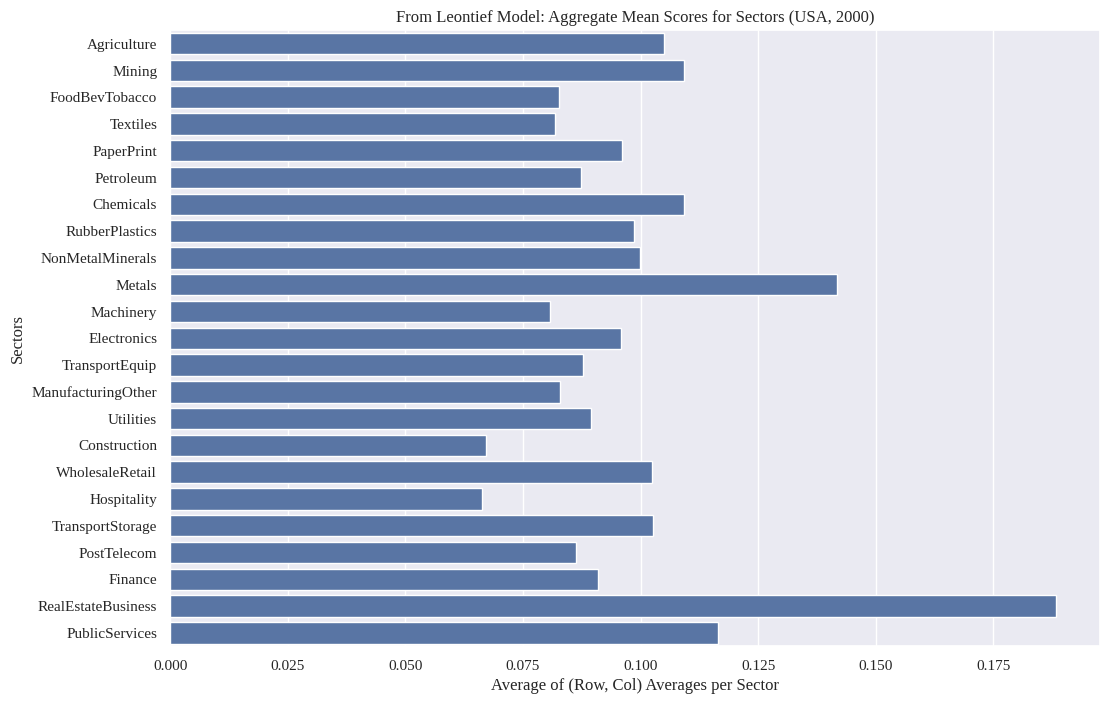

In [ ]:
leontief_demo()


##UI: heatmap_demo()

Interactive Demonstration:
Showing Heatmap for Sector Interaction (Country, Year)

Default Scale on Coloring Axis is Fixed for Ease of Use, Comparison

Possible Country Query Inputs
AUS, AUT, BEL, BRA, CAN, CHN, DEU, DNK, ESP, FIN, FRA, GBR, GRC, HKG, IND, IRL, ITA, JPN, KOR, MEX, NLD, PRT, SWE, TWN, USA

Select a Country: CHN

Possible Query Year Inputs: 1965 - 2000

Select a Year: 2000

Current Query:
Country: CHN
Year: 2000



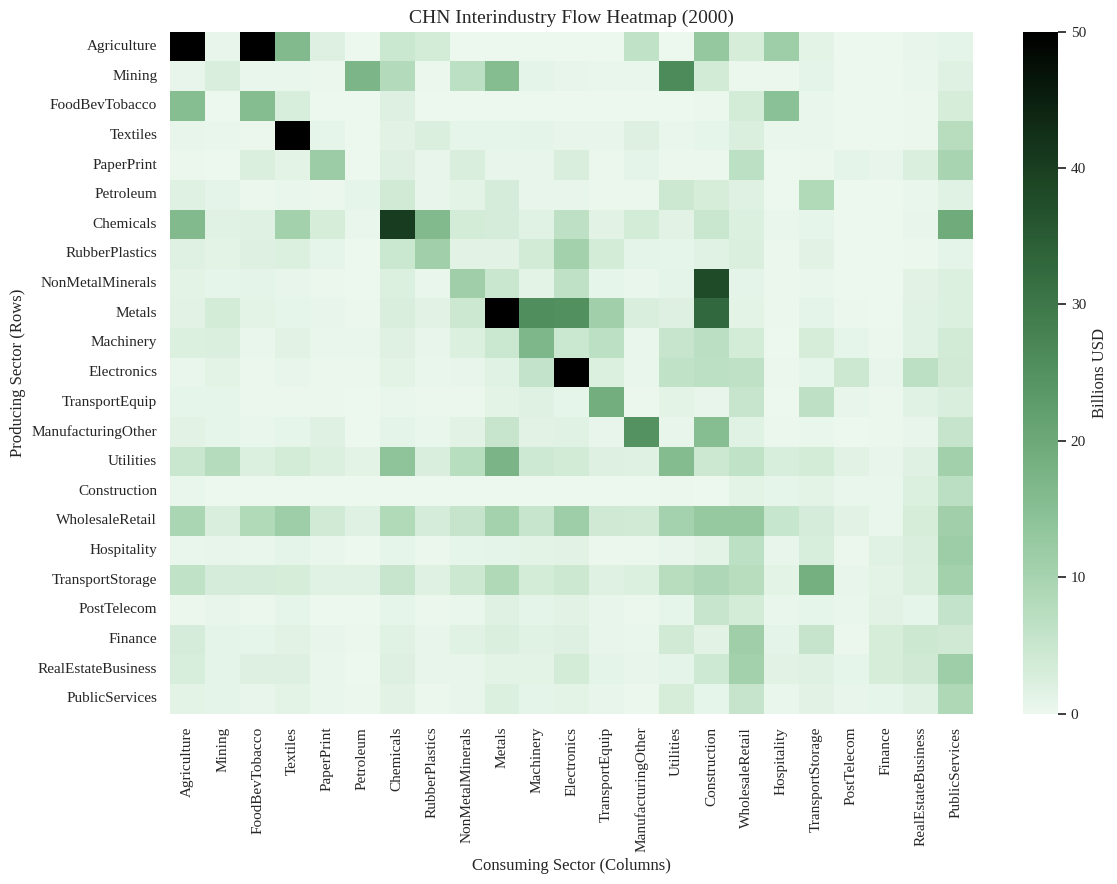

In [ ]:
heatmap_demo()